# FINAL PROJECT 2: LOGISTIC REGRESSION AND SVM
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science
## Our Members:
- Yusraini Nurul Asra
- Arya Rahman
- Monica Belinda

## A. Introduction
### Abstract
Iklim Australia sangat bervariasi di delapan negara bagian dan wilayahnya. Kebanyakan wilayah Australia memiliki empat musim, sementara musim kering dan hujan berlangsung di wilayah tropis di utara benua. Karena negara ini begitu besar, iklim di Australia sangat berbeda dari satu wilayah ke wilayah lain. Secara umum, ada empat musim di sebagian besar negara ini, sementara Top End (termasuk Darwin, Katherine, Kakadu, dan Arnhem Land), Broome, Kimberley dan Tropical North Queensland (Cairns, Whitsundays, dan Daintree Rainforest) mengalami ‘musim basah’ (November hingga April) dan ‘musim kering’ (Mei hingga Oktober). Musim basah di Australia bagian utara ditandai dengan hari yang sangat panas, kelembapan tinggi, hujan monsun dan mungkin siklon, tetapi juga dengan daya tarik tersendiri.

Dari pernyataan sebelumnya, memang setiap musim ada periodenya tersendiri. Tetapi saat ini dunia mengalami perubahan iklim. Perubahan iklim adalah perubahan yang signifikan kepada iklim, suhu udara dan curah hujan mulai dari dasawarsa sampai jutaan tahun. Perubahan iklim yang terjadi secara global tidak bisa dianggap remeh karena dampaknya bagi kehidupan sangat signifikan dan membahayakan. Konvensi Perserikatan Bangsa-Bangsa (PBB) tentang Kerangka Kerja Perubahan Iklim (United Nations Framework Convention on Climate Change/UNFCCC) mendefinisikan penyebab perubahan iklim global baik secara langsung atau tidak langsung adalah dipengaruhi aktivitas manusia sehingga mengubah komposisi dari atmosfer global dan variabilitas iklim alami pada periode waktu yang dapat diperbandingkan. Maka dari itu, periode iklim sudah tidak terlalu akurat lagi. Hujan bisa saja terjadi diluar periode musim basah, dan sebaliknya.

Untuk membantu masyarakat Australia dalam memprediksi hujan di hari esok, maka akan dibuat sebuah analisis prediksi hujan dengan perbandingan metode **Logistic Regression** dan **Support Vector Machine**.

### Data 
Dataset yang digunakan yaitu Rain in Australia yang berisi record data hujan harian selama 10 tahun di Australia. Kolom RainTomorrow adalah target variable yang mau diprediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. Dataset ini memiliki 23 atribut, antara lain:
- Date: tanggal hari itu
- Location: lokasi, nama kota di Australia
- MinTemp: temperatur terendah hari itu dalam celcius
- MaxTemp: temperatur tertinggi hari itu dalam celcius
- Rainfall: jumlah curah hujan hari itu dalam mm
- Evaporation: jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine: jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir: arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed: kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am: arah angin jam 9 pagi
- WindDir3pm: arah angin jam 3 sore
- WindSpeed9am: kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm: kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am: humiditas jam 9 pagi dalam persen
- Humidity3pm: humiditas jam 3 sore dalam persen
- Pressure9am: tekanan udara jam 9 pagi dalam hpa
- Pressure3pm: tekanan udara jam 3 sore dalam hpa
- Cloud9am: persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm: persentase langit yang tertutup awan jam 3 sore
- Temp9am: temperatur jam 9 pagi dalam celcius
- Temp3pm: temperatur jam 3 sore dalam celcius
- RainToday: apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak maka 0.
-  RainTomorrow - variable yang mau di prediksi

### Objectives
Objective yang ingin dicapai dalam analisis ini, yaitu:
- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi hujan di Australia.
- Menemukan model terbaik untuk digunakan dalam memprediksi hujan di Australia.
- Memberikan insight yang dapat membantu pihak penduduk dalam bentuk charts.

## B. Import Libraries

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling
import numpy as np
import sympy as sp
import pandas as pd
from dython.nominal import associations
import missingno as msno

# Data Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
mpl.style.use(["seaborn"])

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from pickle import dump,load

## C. Data Loading

### Import Dataset

Import weatherAUS.csv sebagai df

In [2]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Data tersebut memiliki jumlah baris",len(df), "dan kolom berjumlah",len(df.columns))

Data tersebut memiliki jumlah baris 145460 dan kolom berjumlah 23


### Type of Data

In [4]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Mengubah tipe data Date dari object menjadi datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

### Statistical Data

In [6]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665


### Check Duplicated Data

In [7]:
# Mengecek data duplikat
df.duplicated().sum()

0

### Check Missing Values

<Axes: >

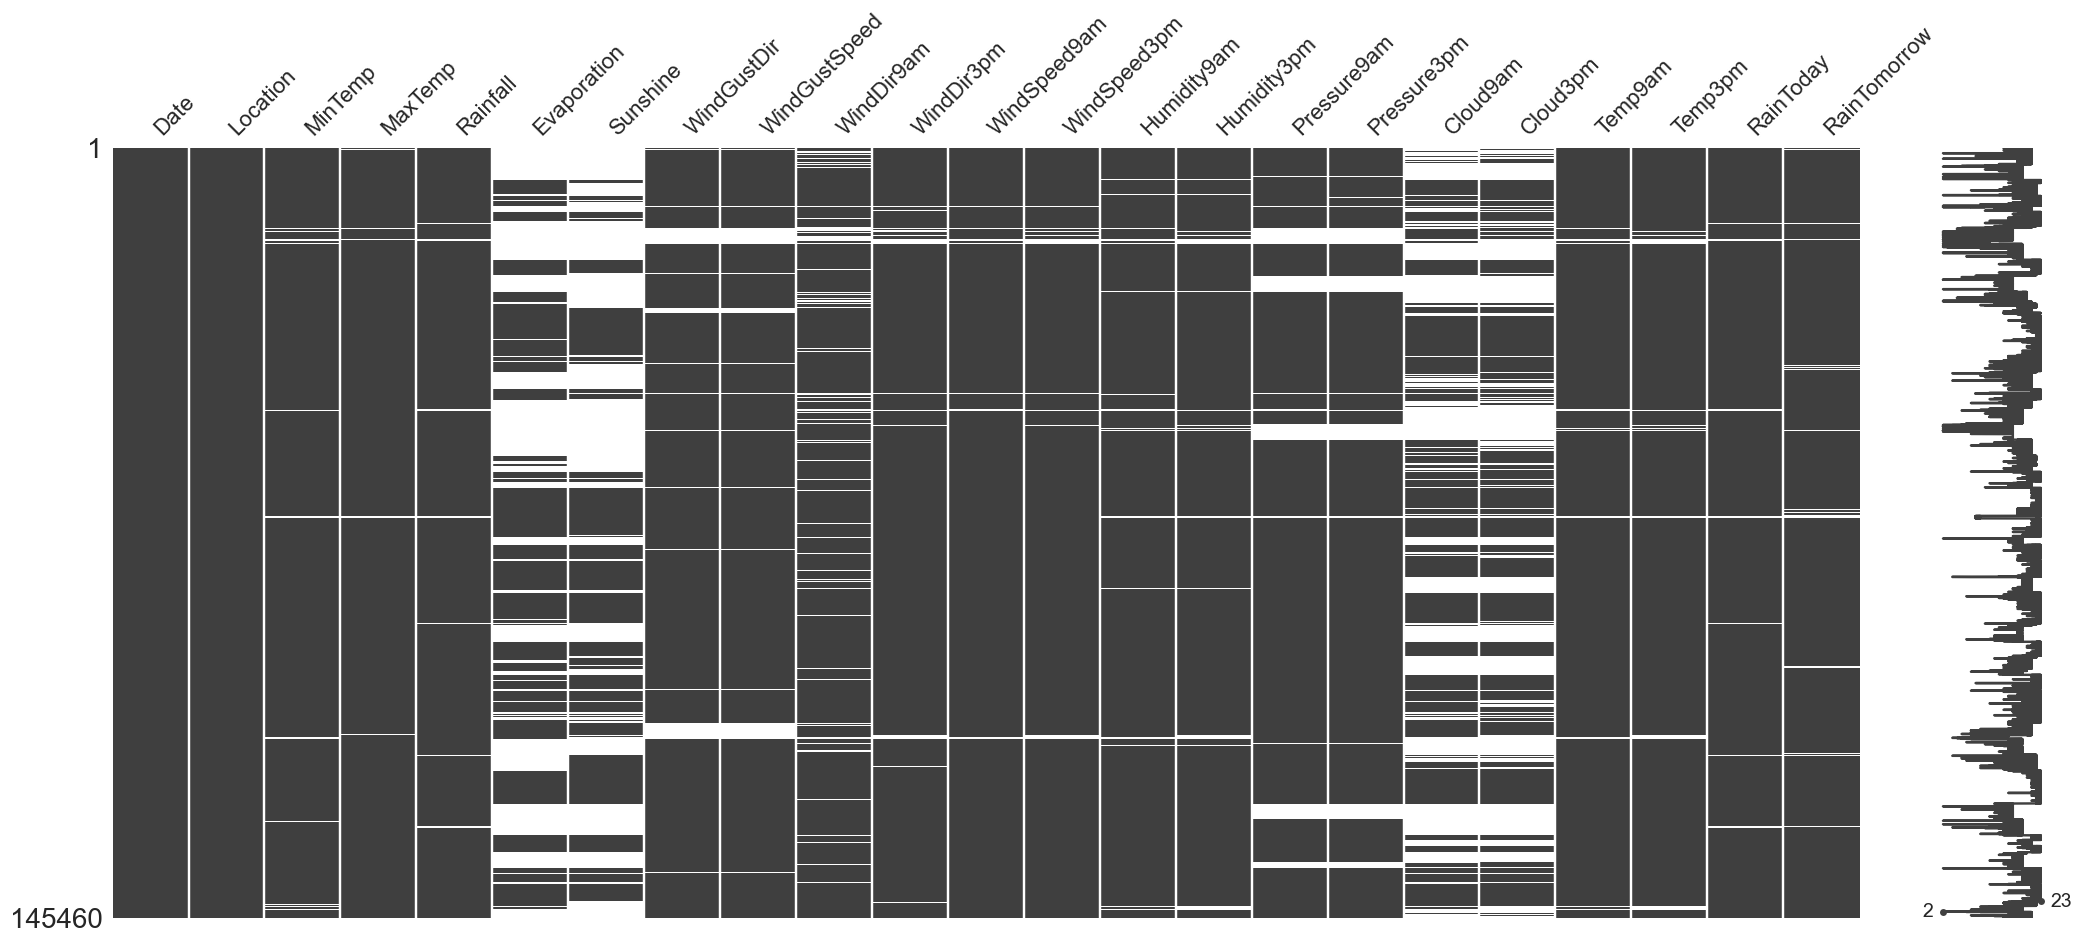

In [8]:
# Visualisasi missing values dengan bantuan library missingno
msno.matrix(df)

In [9]:
# Mengecek missing values
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
Sunshine,float64,69835,48.009762,145,2.9
Evaporation,float64,62790,43.166506,358,44.0
Cloud3pm,float64,59358,40.807095,10,4.0
Cloud9am,float64,55888,38.421559,10,2.0
Pressure9am,float64,15065,10.356799,546,997.5
Pressure3pm,float64,15028,10.331363,549,1028.7
WindDir9am,object,10566,7.263853,16,NNW
WindGustDir,object,10326,7.098859,16,SSW
WindGustSpeed,float64,10263,7.055548,67,96.0
Humidity3pm,float64,4507,3.098446,101,42.0


Dapat dilihat bahwa column Sunshine, Evaporation, Cloud3pm, dan Cloud9am memiliki persentase missing values yang tinggi yakni di atas 30%. Selanjutnya akan dilakukan drop columns agar prediksi memiliki akurasi yang lebih tinggi nantinya. 

## D. Data Cleaning

### Drop Columns with High Missing Values

In [10]:
# Drop column Sunshine, Evaporation, Cloud3pm, dan Cloud9am
df.drop(df[['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']], axis=1, inplace=True)

### Handling Missing Values with fillna

In [11]:
# Terlebih dahulu pisahkan tipe datanya menjadi numerical dan categorical
num_cols = df.columns[df.dtypes == float]
cat_cols = df.columns[df.dtypes == object]

print(f"Numerical Columns\t({len(num_cols)})\t: {list(num_cols)}")
print(f"Categorical Columns\t({len(cat_cols)})\t: {list(cat_cols)}")

Numerical Columns	(12)	: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
Categorical Columns	(6)	: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
# Missing values pada tipe data numerical akan difill dengan mean, sedangkan untuk tipe data categorical akan difill dengan modus.

print("Numerical Columns")
for i in num_cols:
    df[i] = df[i].fillna(df[i].mean())
    print(f"NaN values in {i} have been replaced by {round(df[i].mean(),3)}")

print("\nCategorical Columns")
for i in cat_cols:
    df[i] = df[i].fillna(df[i].mode().values[0])
    print(f"NaN values in {i} have been replaced by {df[i].mode().values[0]}")

Numerical Columns
NaN values in MinTemp have been replaced by 12.194
NaN values in MaxTemp have been replaced by 23.221
NaN values in Rainfall have been replaced by 2.361
NaN values in WindGustSpeed have been replaced by 40.035
NaN values in WindSpeed9am have been replaced by 14.043
NaN values in WindSpeed3pm have been replaced by 18.663
NaN values in Humidity9am have been replaced by 68.881
NaN values in Humidity3pm have been replaced by 51.539
NaN values in Pressure9am have been replaced by 1017.65
NaN values in Pressure3pm have been replaced by 1015.256
NaN values in Temp9am have been replaced by 16.991
NaN values in Temp3pm have been replaced by 21.683

Categorical Columns
NaN values in Location have been replaced by Canberra
NaN values in WindGustDir have been replaced by W
NaN values in WindDir9am have been replaced by N
NaN values in WindDir3pm have been replaced by SE
NaN values in RainToday have been replaced by No
NaN values in RainTomorrow have been replaced by No


In [13]:
# Cek kembali missing valuesnya
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Removing Outliers

Untuk mendapatkan hasil yang lebih akurat nantinya, maka perlu dilakukan removing outliers (pencilan). Terlebih dahulu akan dibuat fungsi untuk mendeteksi outliers serta visualisasi outliersnya.

In [14]:
# Fungsi untuk Visualisasi Outliers
def create_boxplot(num1,num2,data,x_axis):
    nrows,ncols = num1,num2

    fig,ax=plt.subplots(nrows,ncols,figsize=(25,15),dpi=200)

    n = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.boxplot(data=data,x=x_axis[n],ax=ax[i,j])
            ax[i,j].set_title(f"Box Plot of {x_axis[n]}")
            n += 1

    plt.tight_layout()
    plt.show()

# Fungsi untuk Mendeteksi Outliers
def find_outlier(data):
    q1 = np.quantile(data,0.25)
    q3 = np.quantile(data,0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)
    
    outlier = []
    for i in data:
        if (i < min_iqr) or (i > max_iqr):
            outlier.append(i)
    
    return outlier

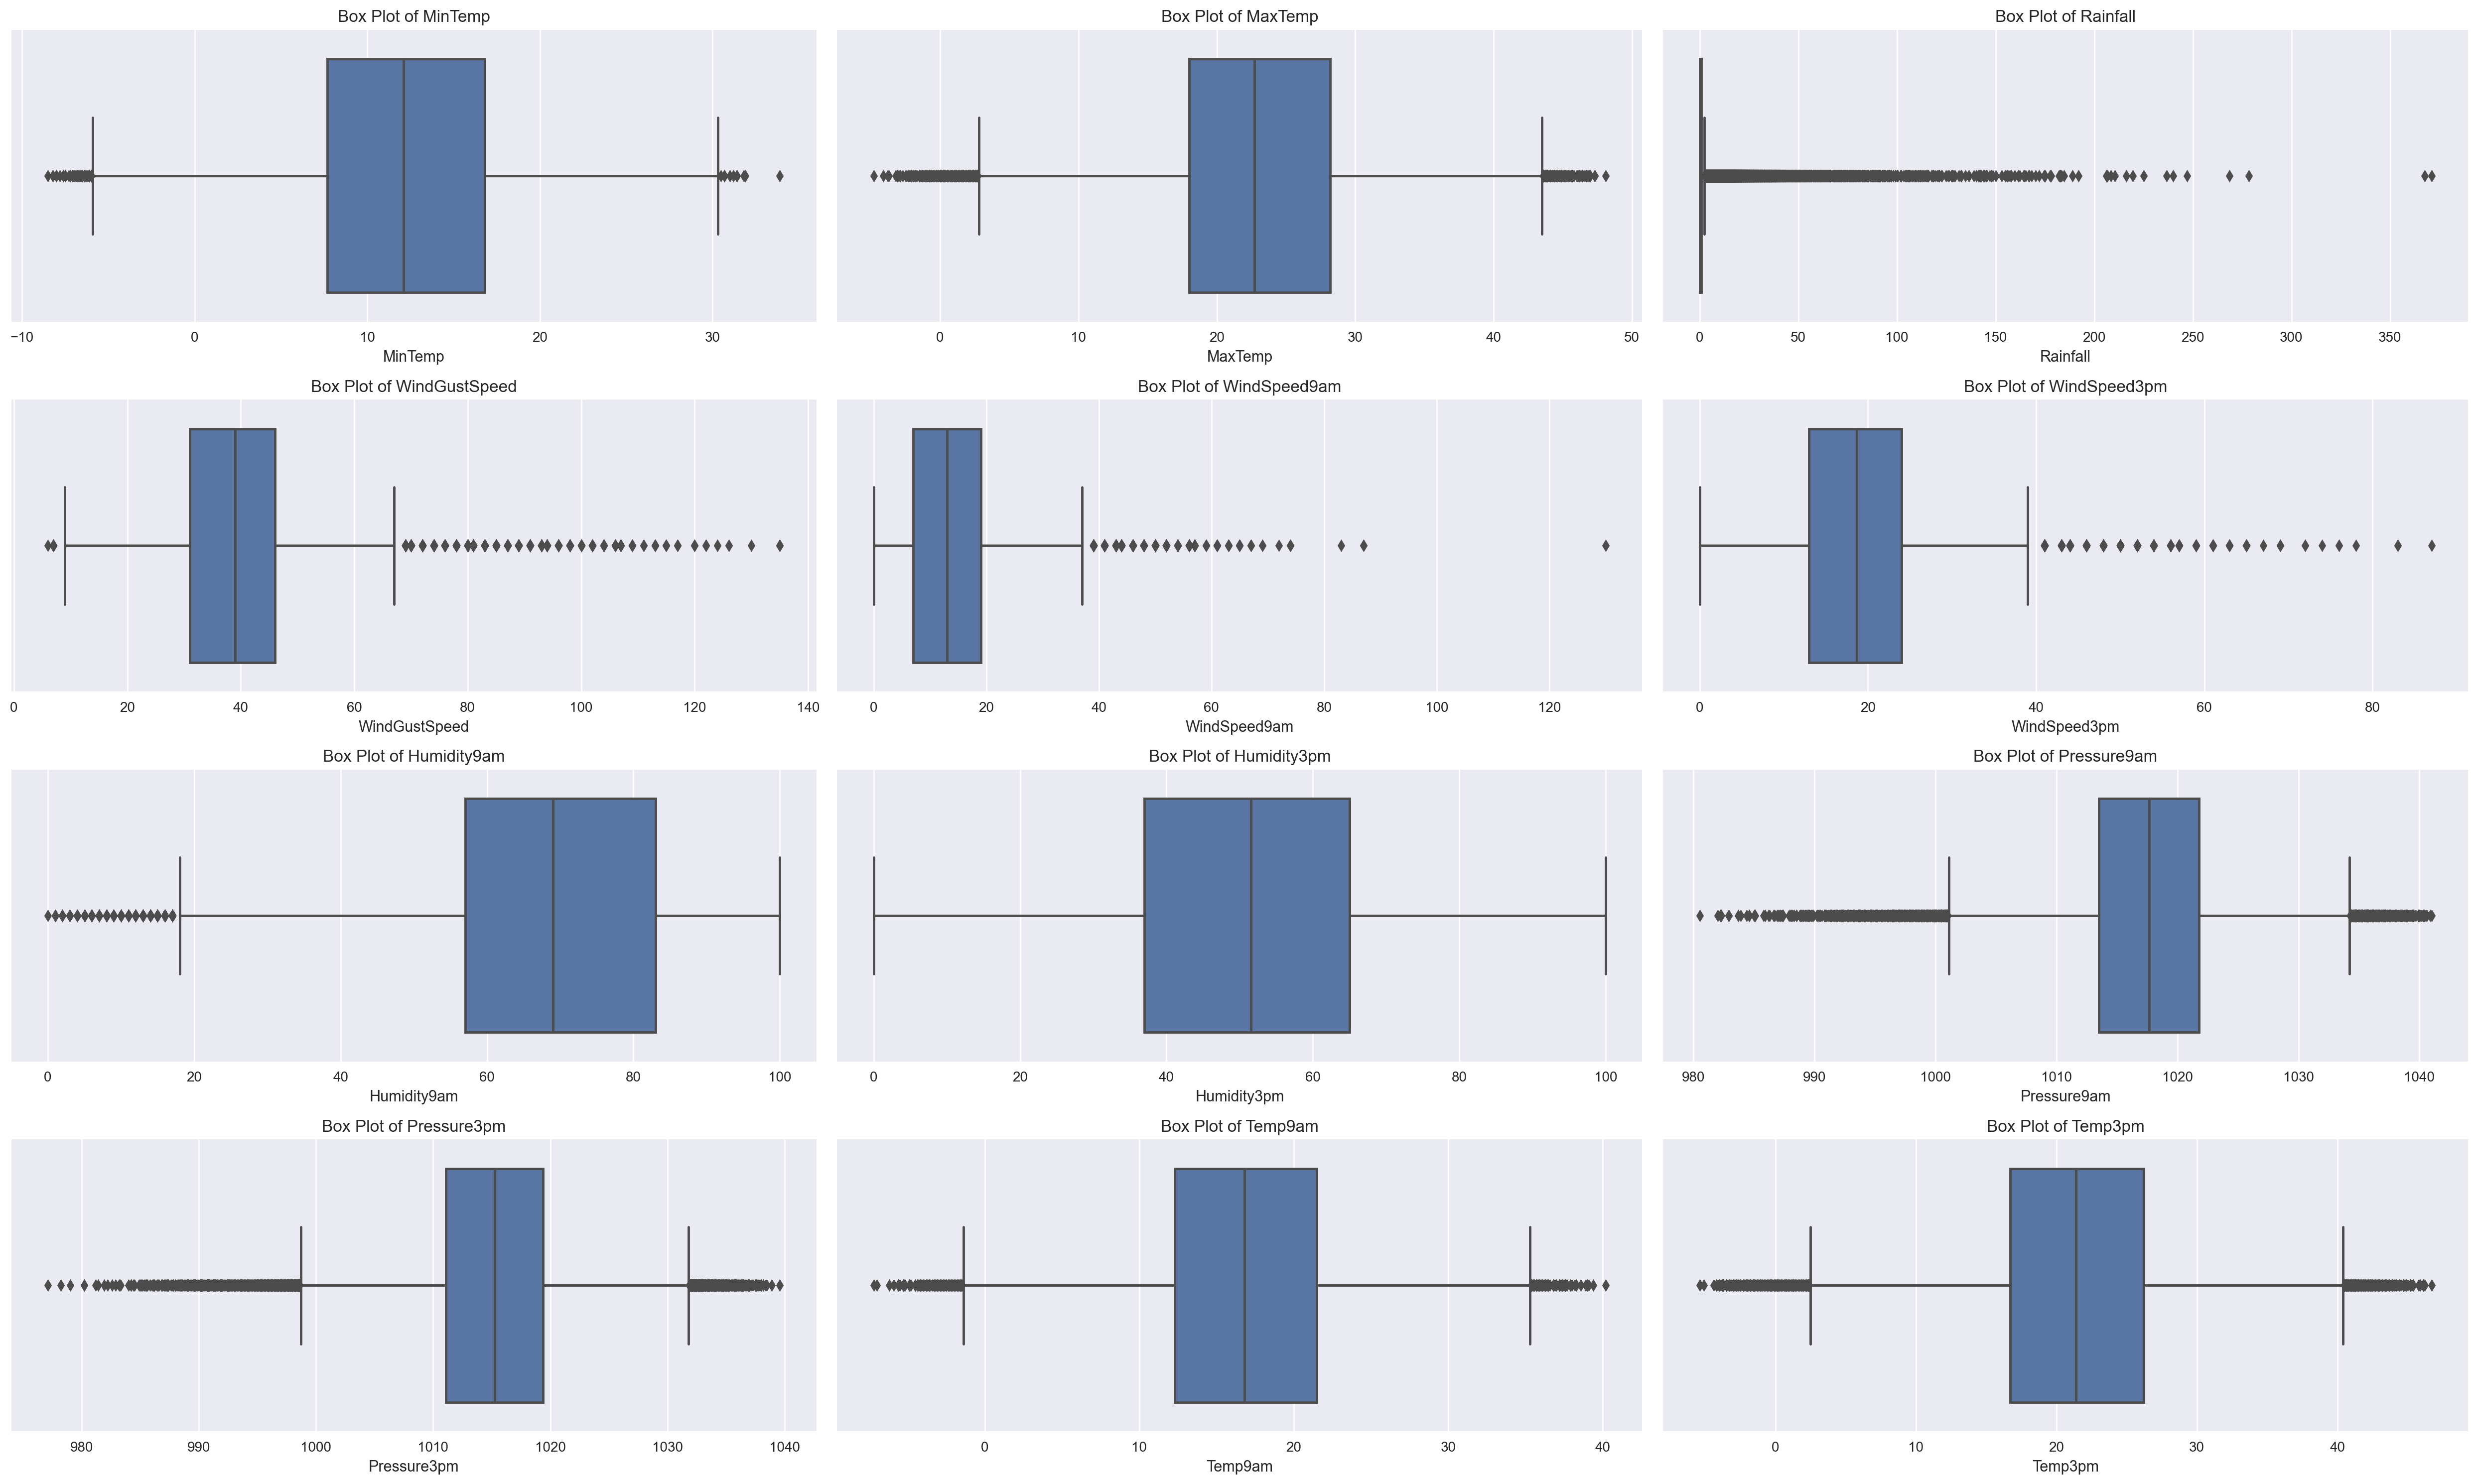

,outliers,percentage
Rainfall,23723,16.308951
WindGustSpeed,5523,3.796920
Pressure9am,2758,1.896054
Pressure3pm,2524,1.735185
WindSpeed3pm,2523,1.734497
WindSpeed9am,1817,1.249141
Humidity9am,1425,0.979651
Temp3pm,988,0.679225
MaxTemp,544,0.373986
Temp9am,307,0.211055


In [15]:
# Memvisualisasikan Outliers
create_boxplot(4,3,df,num_cols)

# Mendeteksi Outliers
pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in num_cols]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in num_cols]]) / len(df) * 100
}).set_index(num_cols).sort_values("outliers",ascending=False)

Dapat dilihat di atas bahwa outliersnya cukup tinggi sehingga diperlukan removing outliers untuk mendapatkan hasil yang lebih akurat nantinya. Removing outliers dilakukan dengan metode IQR (Interquartile Range).

In [16]:
# Removing outliers dengan metode IQR
for i in num_cols:
    q1 = np.quantile(df[i],0.25)
    q3 = np.quantile(df[i],0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)

    df = df[(df[i] >= min_iqr) & (df[i] <= max_iqr)]

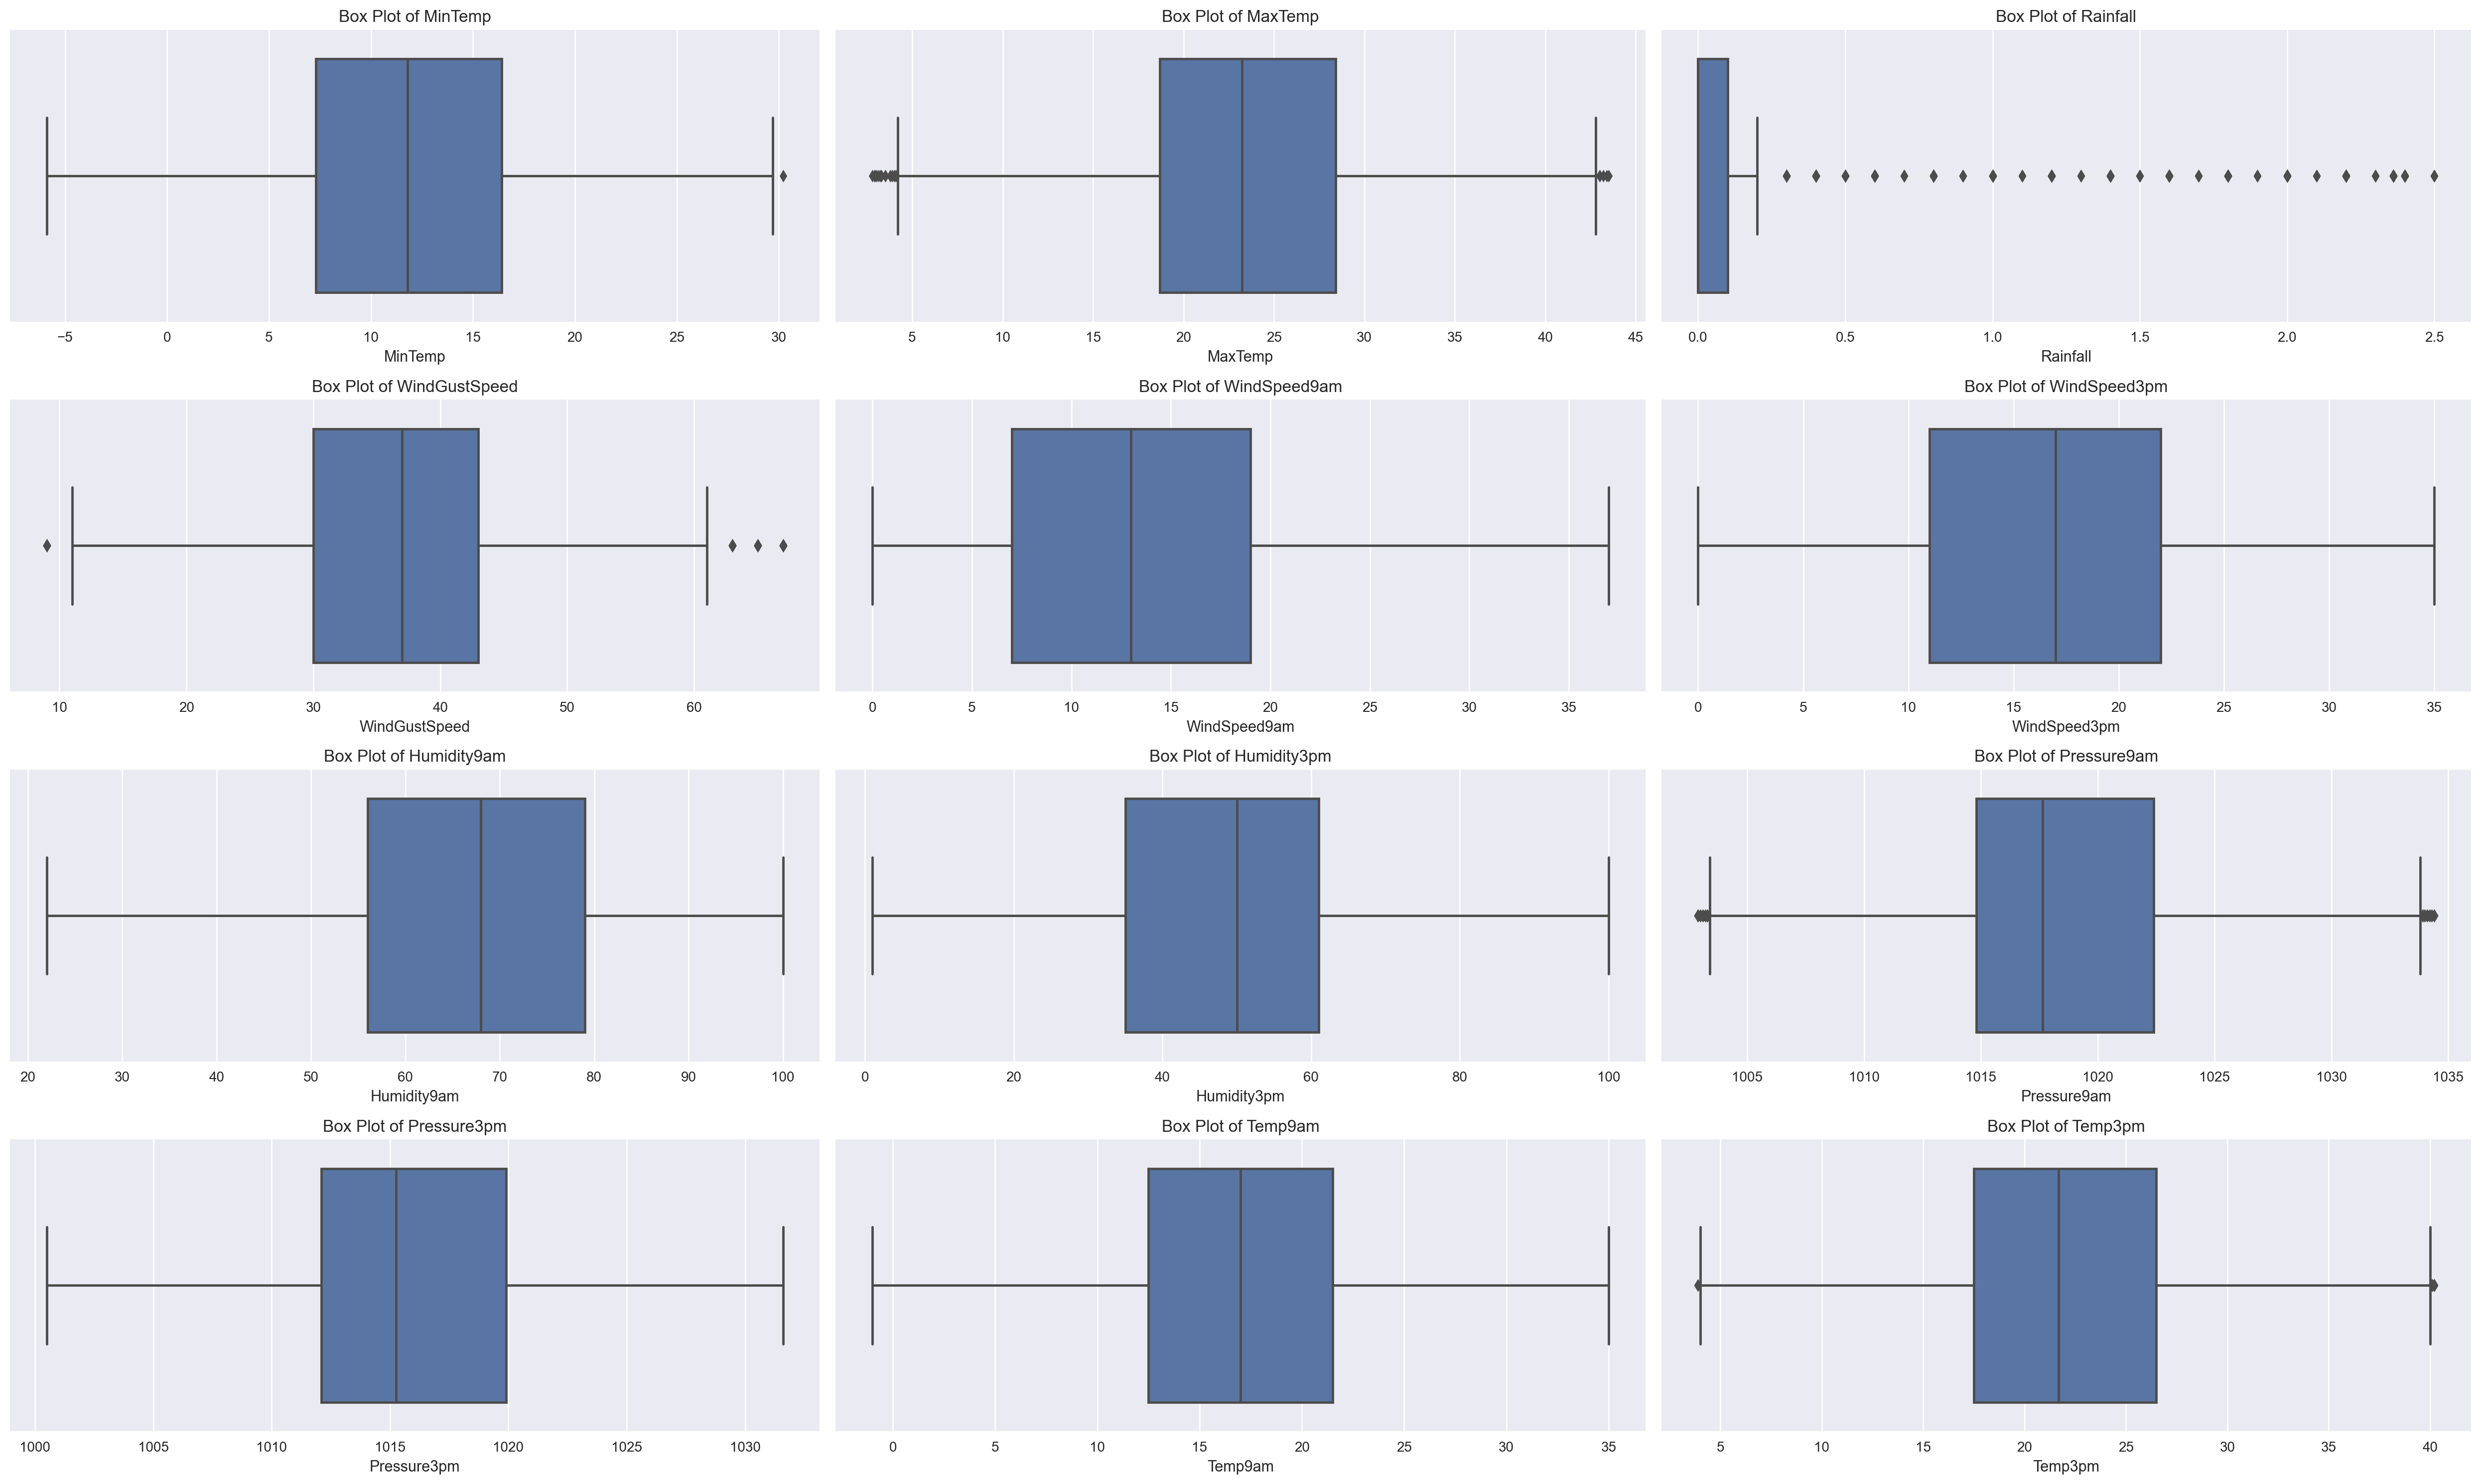

,outliers,percentage
Rainfall,19371,17.598321
WindGustSpeed,1531,1.390895
Pressure9am,283,0.257102
Temp3pm,33,0.029980
MaxTemp,20,0.018170
MinTemp,1,0.000908
WindSpeed9am,0,0.000000
WindSpeed3pm,0,0.000000
Humidity9am,0,0.000000
Humidity3pm,0,0.000000


In [17]:
# Visualisasikan outliers kembali setelah melakukan removing outliers
create_boxplot(4,3,df,num_cols)

# Menampilkan outliers kembali setelah melakukan removing outliers
pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in num_cols]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in num_cols]]) / len(df) * 100
}).set_index(num_cols).sort_values("outliers",ascending=False)

## E. Exploration Data Analysis

### Rain Tomorrow Percentage Based on Rain Today

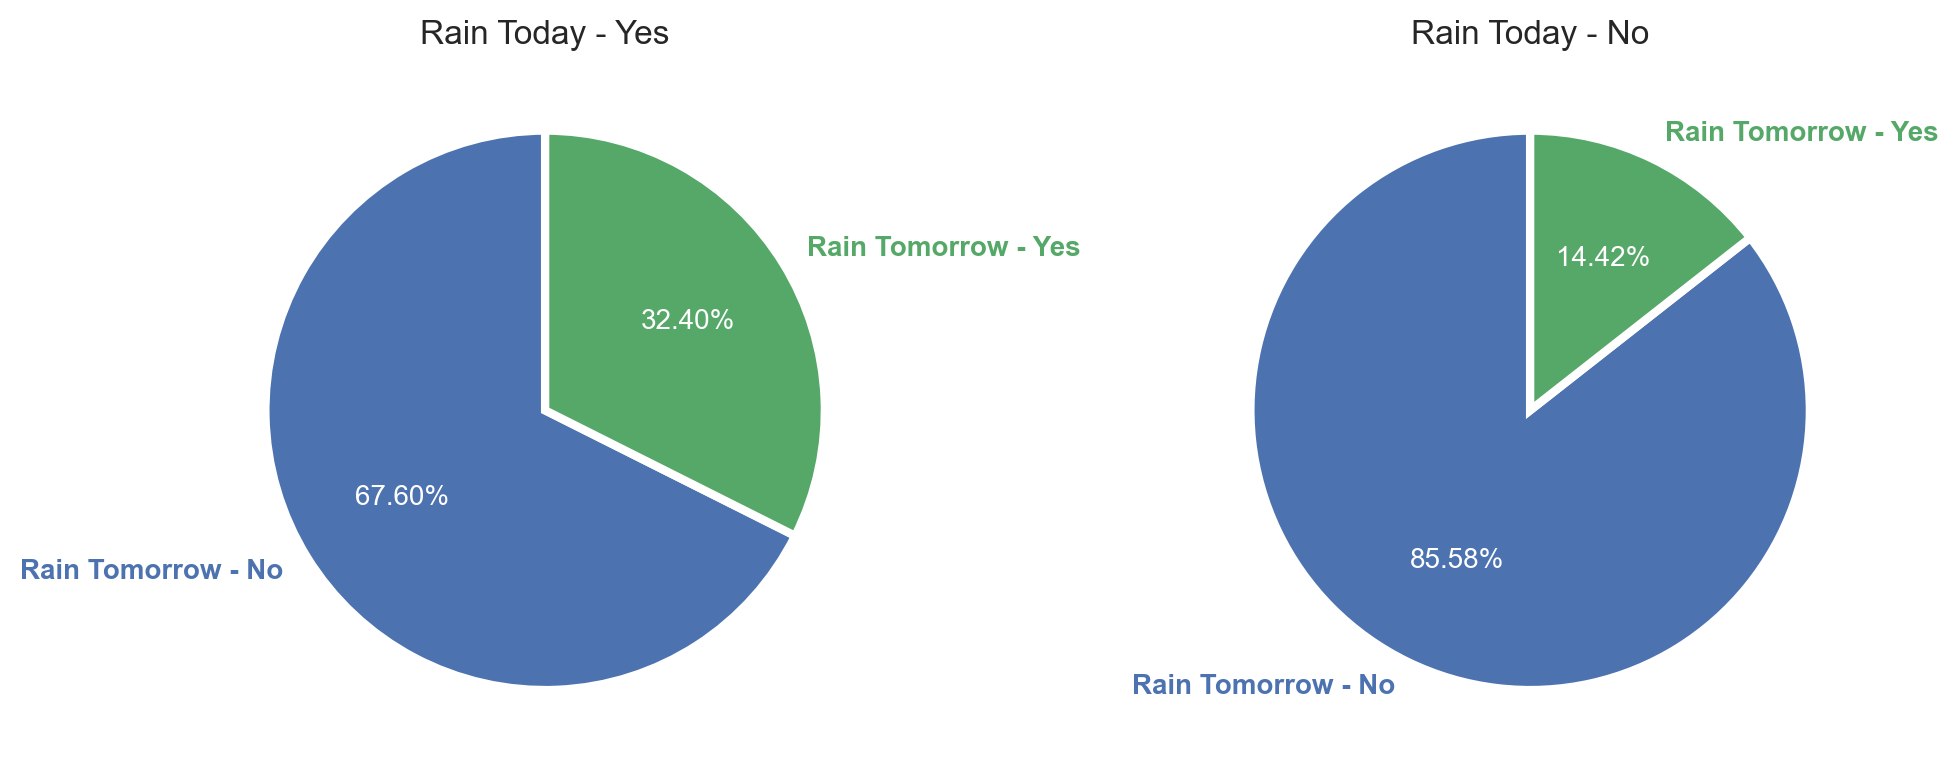

In [18]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["RainToday","RainTomorrow"]).count()[["Location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")
    
plt.tight_layout()
plt.show()

Mengkalkulasi persentase terjadinya hujan besok berdasarkan hujan atau tidak hari ini. Dapat dilihat pada pie chart di atas bahwa jika hari ini hujan, peluang besok hujan lebih tinggi jika dibandingkan dengan jika hari ini tidak hujan. Begitu pula sebaliknya jika hari ini tidak hujan, peluang besok tidak hujan lebih tinggi jika dibandingkan dengan jika hari ini hujan.

### Rainfall Distribution in Each Season

In [19]:
# Membuat fungsi get_season terlebih dahulu seperti berikut
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Membuat column season berisikan apply function get_season ke column Date month 
df['Season'] = df['Date'].dt.month.apply(get_season)

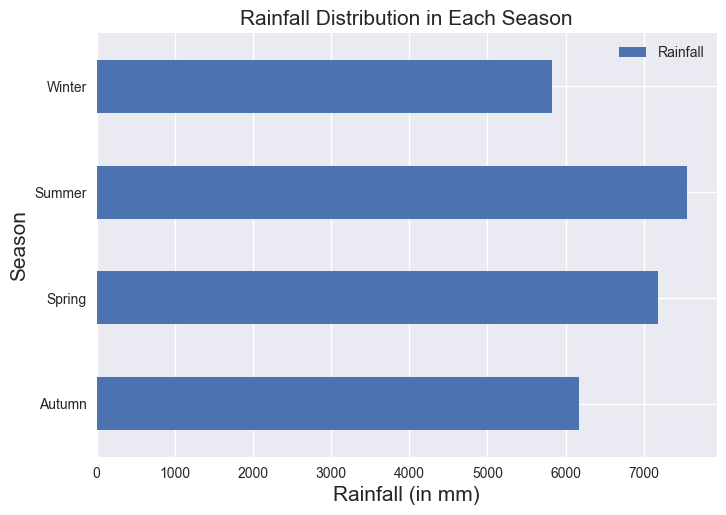

In [20]:
# Visualisasi Rainfall Distribution in Each Season
rainfall =[df['Rainfall'],df['Season']]
headers = ['Rainfall','Season']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)
r = rainfall_df.groupby('Season').agg({'Rainfall':'sum'})
r.plot(kind='barh')
plt.title('Rainfall Distribution in Each Season', fontsize=15)
plt.ylabel('Season', fontsize=15)
plt.xlabel('Rainfall (in mm)', fontsize=15)
plt.show()

# Drop column season karena sejak awal column tersebut tidak ada pada dataset, hanya untuk visualisasi eksplorasi analisis data saja
df.drop(df[['Season']],axis=1,inplace=True)

Dari bar chart di atas dapat dilihat bahwa rainfall distribution tertinggi yakni pada season summer sebesar 7554.4 mm, disusul season spring (7178.2 mm), autumn (6169.9), lalu winter (5829.7 mm).

### Hows the Humidity at 9am and 3pm in 4 years (2014-2017)?

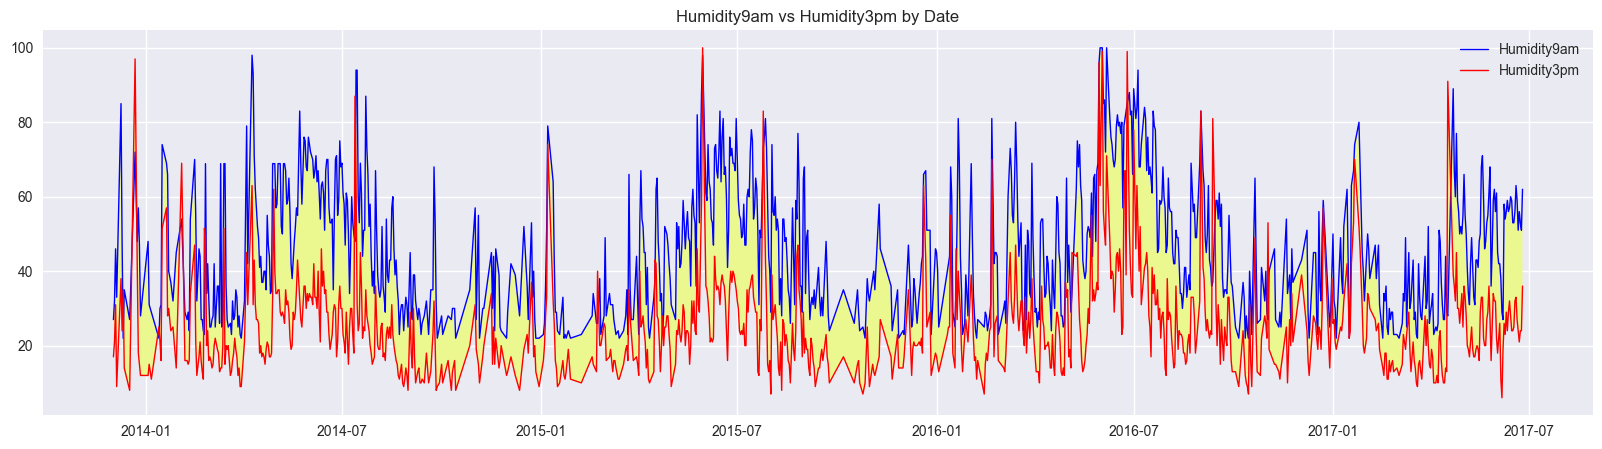

In [21]:
# Memvisualisasikan Humidity berdasarkan Date
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Humidity9am'],color='blue',linewidth=1, label= 'Humidity9am')
plt.plot(df_dateplot['Date'],df_dateplot['Humidity3pm'],color='red',linewidth=1, label= 'Humidity3pm')
plt.fill_between(df_dateplot['Date'],df_dateplot['Humidity9am'],df_dateplot['Humidity3pm'], facecolor = '#EBF78F')
plt.title('Humidity9am vs Humidity3pm by Date')
plt.legend(loc='upper right', frameon=False)
plt.show()

Dari hasil visualisasi di atas dapat dilihat terdapat perbedaan diantara kelembapan jam 9 pagi dan jam 3 sore, dimana kelembapan pada jam 9 pagi cenderung lebih tinggi dibandingkan kelembapan pada jam 3 sore. Dapat dilihat juga bahwa kelembapan tinggi di sekitar bulan Juni-Juli.

### Which Location Has the Most Minimum Temperature and Maximum Temperature?

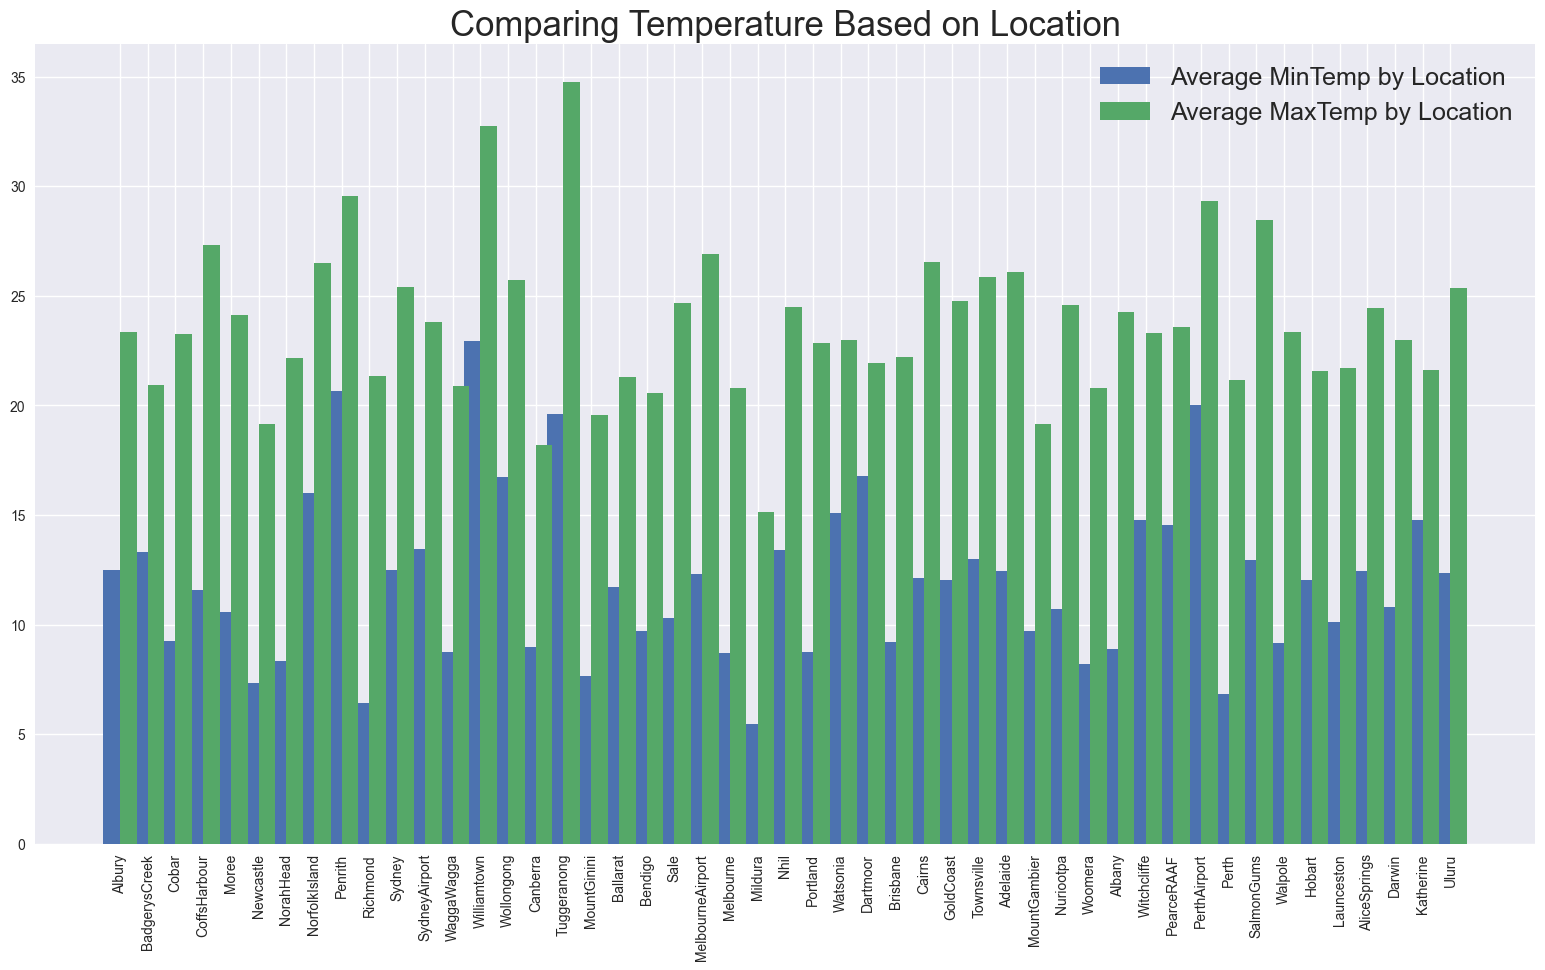

In [22]:
# Membandingkan Temperature berdasarkan Location
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (15,8)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
plt.title("Comparing Temperature Based on Location", fontsize=25)
plt.legend(fontsize=18)
plt.show()

Berdasarkan hasil visualisasi tersebut dapat dilihat bahwa location dengan temperatur terendah di Mildura sedangkan temperatur tertinggi di location Tuggeranong.

### Which Direction Do the Wind Gust?

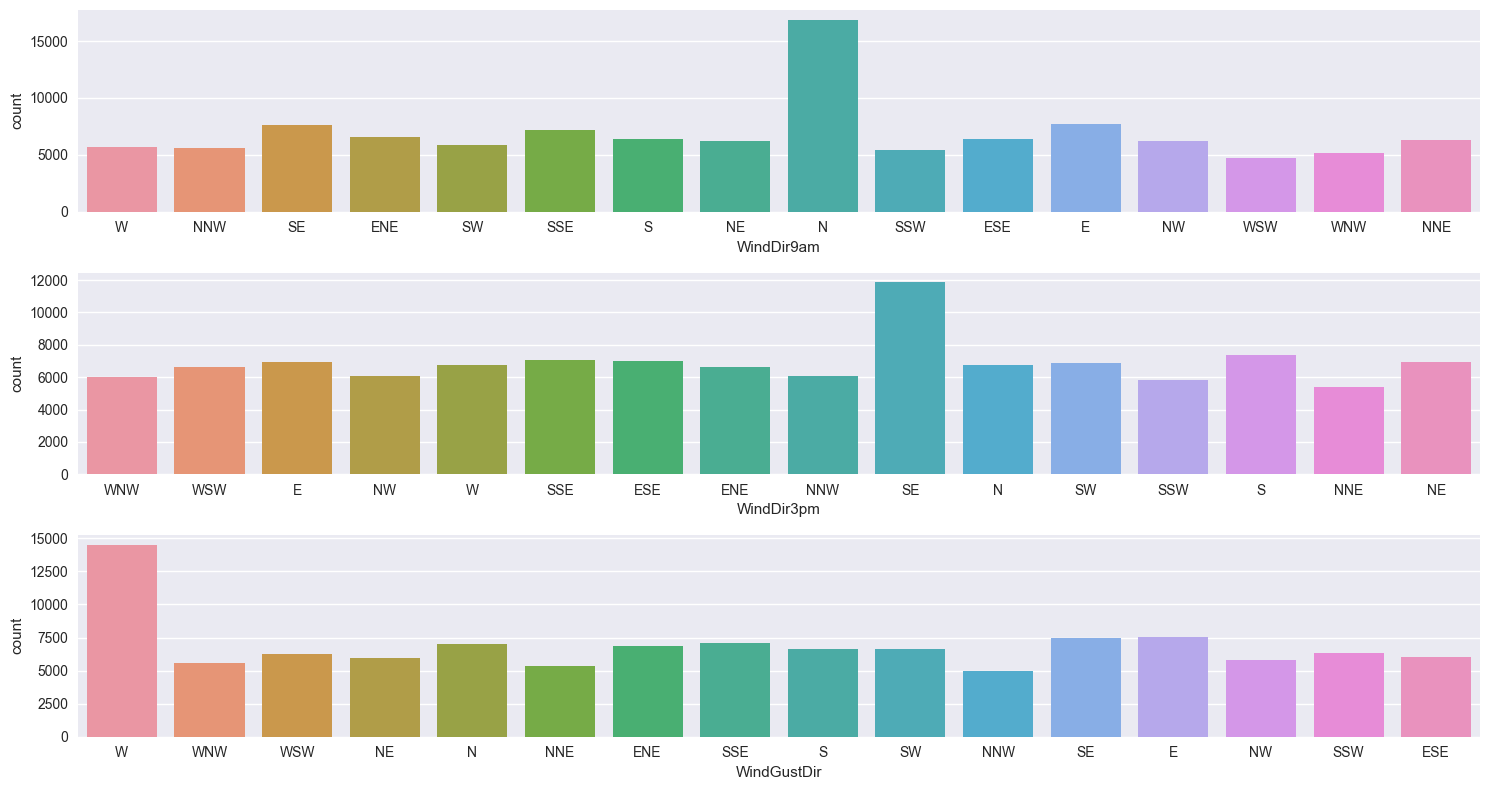

<Figure size 1000x1000 with 0 Axes>

In [23]:
# Visualisasi Direction dari Wind di pukul 9 pagi dan 3 sore, serta selama 24 jam
fig, ax = plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=df,x='WindDir9am',ax=ax[0])
sns.countplot(data=df,x='WindDir3pm',ax=ax[1])
sns.countplot(data=df,x='WindGustDir',ax=ax[2])
fig.tight_layout()

Berdasarkan hasil di atas dapat disimpulkan bahwa arah angin jam 9 pagi cenderung ke Utara (North) dan arah angin jam 3 sore cenderung ke Tenggara (South East). Sedangkan arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu adalah Barat (West).

## F. Data Preprocessing

Mencari korelasi antara column numerical dan categorical dengan bantuan library dython.

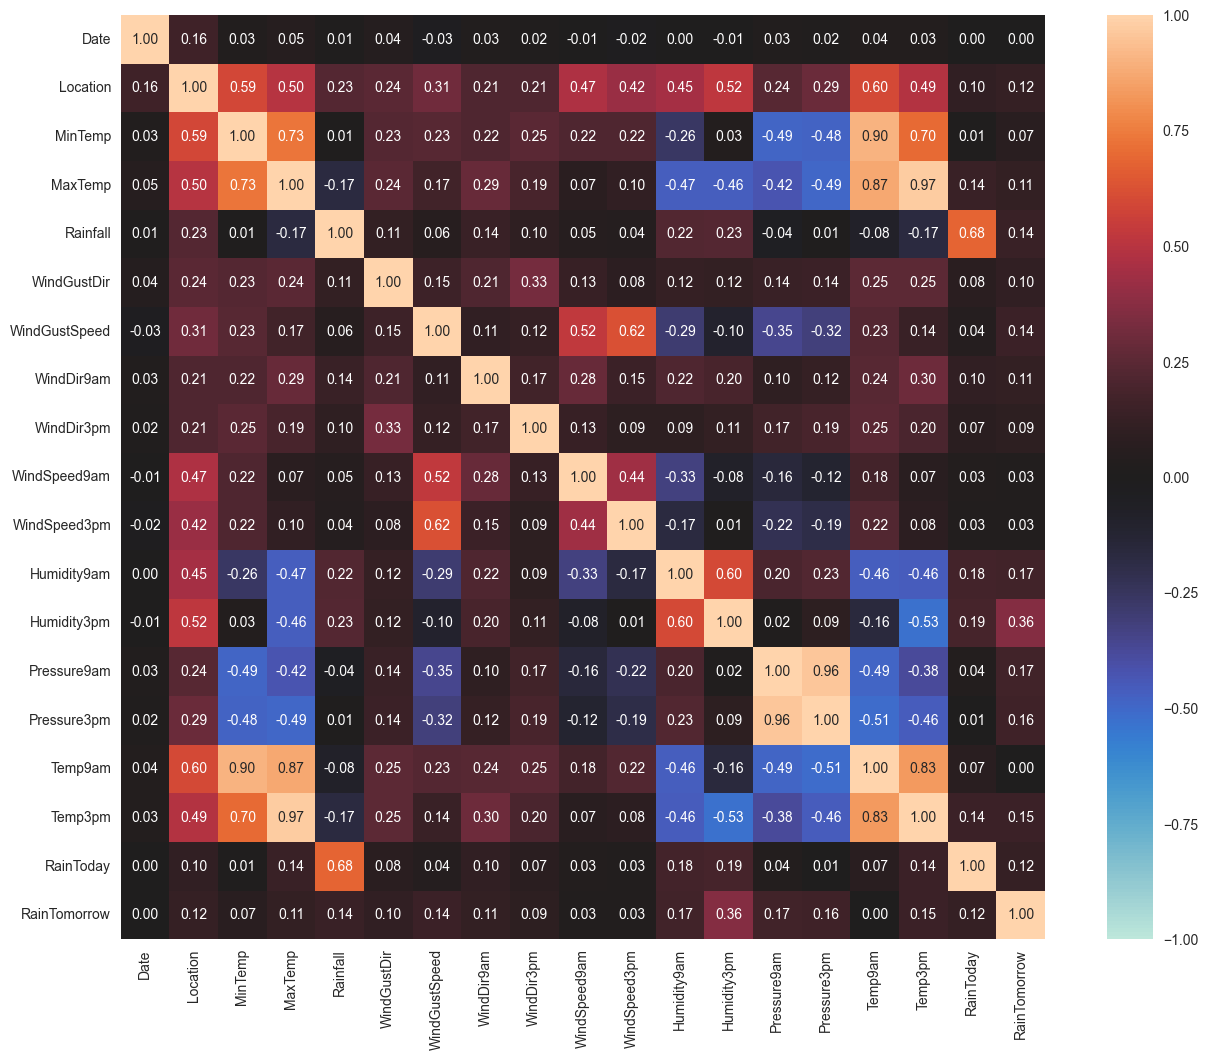

In [24]:
corr = associations(df,figsize=(16,12))

Agar dapat lebih jelas dilihat columns (features) yang paling mempengaruhi RainTomorrow, koefisien korelasinya akan diurutkan untuk kemudian didrop columns (features) yang tidak terlalu berpengaruh terhadap RainTomorrow.

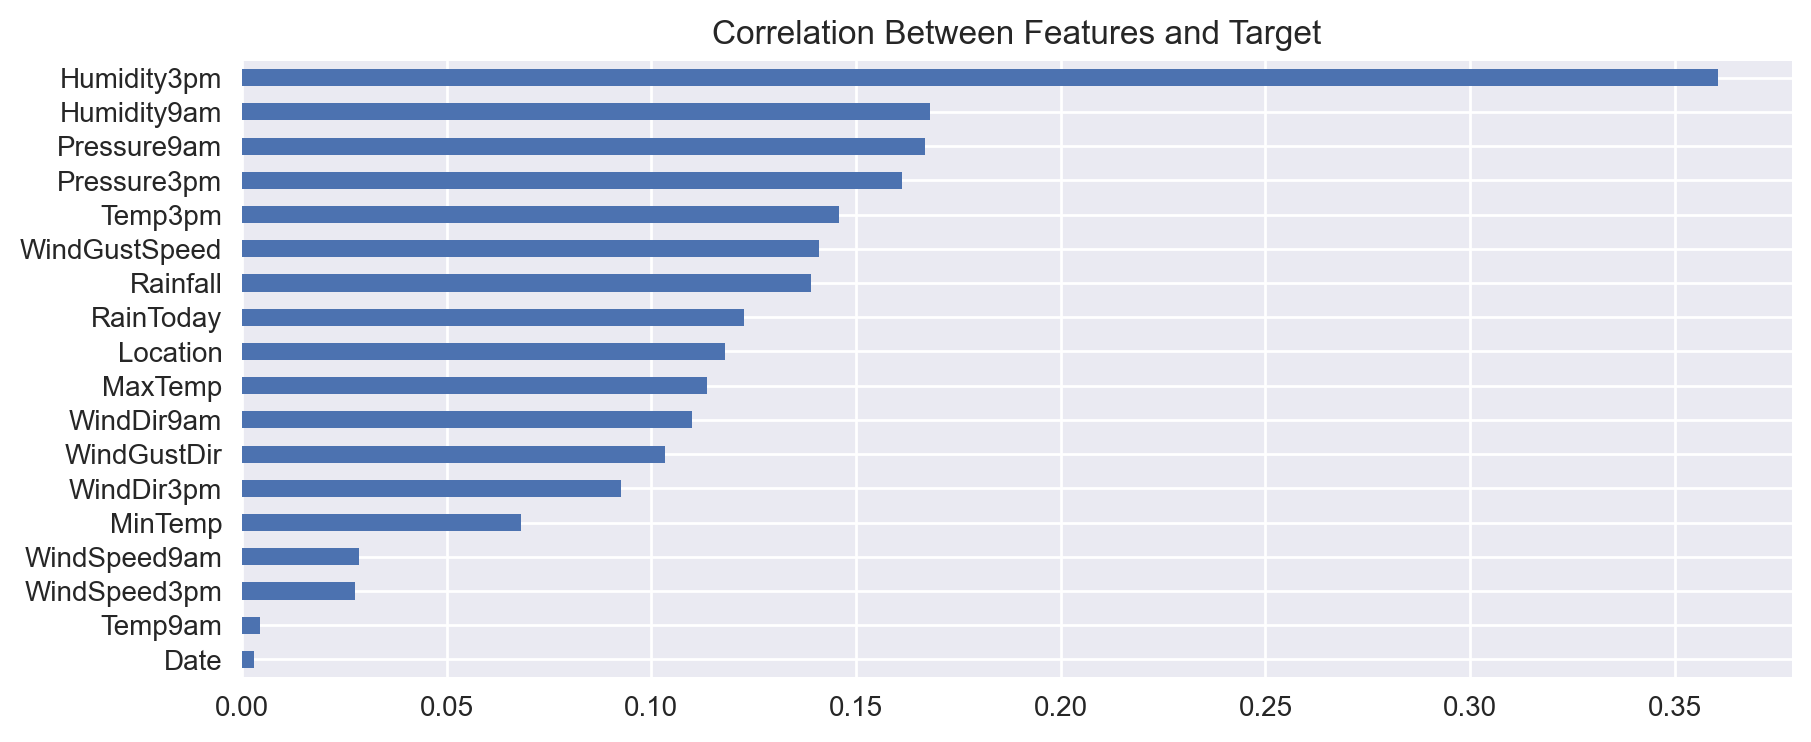

In [25]:
fig = plt.figure(figsize=(10,4),dpi=200)
corr["corr"][["RainTomorrow"]].iloc[:-1].sort_values("RainTomorrow").plot(
    kind="barh",
    legend=None,
    title="Correlation Between Features and Target",
    ax=plt.gca()
)
plt.show()

Dapat dilihat dari plot tersebut bahwa WindSpeed9am, WindSpeed3pm, Temp9am, dan Date memiliki korelasi yang kecil terhadap RainTomorrow, sehingga selanjutnya akan dilakukan drop columns.

In [26]:
df = df.drop(corr["corr"][["RainTomorrow"]].sort_values("RainTomorrow").iloc[:4].index,axis=1)
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 110073
Number of Columns	: 15


Sekarang dataset memiliki 110.073 baris dan 15 kolom.

In [27]:
# Karena pada independent variable terdapat data categorical, maka akan dilakukan LabelEncoder terlebih dahulu
df_categ = df[cat_cols]
for i in cat_cols:
    Lenc = LabelEncoder()
    df_categ[i] = Lenc.fit_transform(df_categ[i])
    df[i] = df_categ[i]

In [28]:
# Mendefinisikan variabel independent (X) dan variabel dependent (y)
X = df.drop("RainTomorrow",axis=1)
y = df["RainTomorrow"]

In [29]:
# Split dataframe menjadi data training dan data testing dengan ratio 70:30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(f"Training dataset\t: {len(X_train)} ({round(len(X_train) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)} ({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 77051 (70%)
Testing dataset		: 33022 (30%)


In [30]:
# Karena setiap variabel independen memiliki scale yang berbeda, maka akan dilakukan standarisasi dengan StandardScaler()
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## G. Models Definition

### Logistic Regression

In [31]:
# Pemodelan 1 Logistic Regression
logreg1 = LogisticRegression(solver='liblinear',penalty='l1', random_state = 42)

In [32]:
# Pemodelan 2 Logistic Regression (Menambahkan parameter class_weight="balanced" untuk mengatasi ketidakseimbangan prediksi)
logreg2 = LogisticRegression(solver='liblinear',penalty='l1',class_weight="balanced", random_state = 42)

### Support Vector Machine

In [33]:
# Pemodelan 1 Support Vector Machine
svm1 = SVC(kernel='rbf',random_state=42)

In [34]:
# Pemodelan 1 Support Vector Machine (Menambahkan parameter class_weight="balanced" untuk mengatasi ketidakseimbangan prediksi)
svm2 = SVC(kernel='rbf',class_weight="balanced",random_state=42)

## H. Models Training

### Logistic Regression

Gunakan model logistic regression untuk memprediksi raintomorrow dan menghitung probabilitynya.

In [35]:
# Training Pemodelan 1 Logistic Regression
logreg1.fit(scaled_X_train,y_train)
logpred1 = logreg1.predict(scaled_X_test)

# Akan ditampilkan hasil prediksinya
logprob1 = logreg1.predict_proba(scaled_X_test)
pd.DataFrame({
    "probability_yes_raintomorrow":logprob1[:,1] * 100,
    "probability_no_raintomorrow":logprob1[:,0] * 100,
    "prediction_raintomorrow":logpred1,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,logpred1)]
}).reset_index(drop=True)

,probability_yes_raintomorrow,probability_no_raintomorrow,prediction_raintomorrow,actual_raintomorrow,accuracy
0,15.133284,84.866716,0,0,True
1,2.824692,97.175308,0,0,True
2,26.885138,73.114862,0,0,True
3,8.613951,91.386049,0,0,True
4,28.202890,71.797110,0,0,True
...,...,...,...,...,...
33017,18.625895,81.374105,0,0,True
33018,1.161885,98.838115,0,0,True
33019,3.247686,96.752314,0,0,True
33020,6.137395,93.862605,0,0,True


In [36]:
# Training Pemodelan 2 Logistic Regression
logreg2.fit(scaled_X_train,y_train)
logpred2 = logreg2.predict(scaled_X_test)

# Akan ditampilkan hasil prediksinya
logprob2 = logreg2.predict_proba(scaled_X_test)
pd.DataFrame({
    "probability_yes_raintomorrow":logprob2[:,1] * 100,
    "probability_no_raintomorrow":logprob2[:,0] * 100,
    "prediction_raintomorrow":logpred2,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,logpred2)]
}).reset_index(drop=True)

,probability_yes_raintomorrow,probability_no_raintomorrow,prediction_raintomorrow,actual_raintomorrow,accuracy
0,49.911241,50.088759,0,0,True
1,13.588388,86.411612,0,0,True
2,66.714326,33.285674,1,0,False
3,34.220788,65.779212,0,0,True
4,69.115903,30.884097,1,0,False
...,...,...,...,...,...
33017,55.891835,44.108165,1,0,False
33018,6.215957,93.784043,0,0,True
33019,14.846033,85.153967,0,0,True
33020,28.942342,71.057658,0,0,True


### Support Vector Machine

Gunakan model support vector machine untuk memprediksi raintomorrow dan menghitung probabilitynya.

In [37]:
# Training Pemodelan 1 Support Vector Machine
svm1.fit(scaled_X_train,y_train)
svmpred1 = svm1.predict(scaled_X_test)

# Akan ditampilkan hasil prediksinya (Menurut berbagai sumber, predict() and predict_proba() di SVM memberikan hasil inconsistent. Serta, predict_proba() hanya bekerja jika parameter probability = True digunakan, namun hal ini akan menambah waktu untuk melatih model secara signifikan)
pd.DataFrame({
    "prediction_raintomorrow":svmpred1,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,svmpred1)]
}).reset_index(drop=True)

,prediction_raintomorrow,actual_raintomorrow,accuracy
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
33017,0,0,True
33018,0,0,True
33019,0,0,True
33020,0,0,True


In [38]:
# Training Pemodelan 2 Support Vector Machine
svm2.fit(scaled_X_train,y_train)
svmpred2 = svm2.predict(scaled_X_test)

# Akan ditampilkan hasil prediksinya (Menurut berbagai sumber, predict() and predict_proba() di SVM memberikan hasil inconsistent. Serta, predict_proba() hanya bekerja jika parameter probability = True digunakan, namun hal ini akan menambah waktu untuk melatih model secara signifikan)
pd.DataFrame({
    "prediction_raintomorrow":svmpred2,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,svmpred2)]
}).reset_index(drop=True)

,prediction_raintomorrow,actual_raintomorrow,accuracy
0,0,0,True
1,0,0,True
2,1,0,False
3,0,0,True
4,0,0,True
...,...,...,...
33017,0,0,True
33018,0,0,True
33019,0,0,True
33020,0,0,True


## I. Models Evaluation

### Confusion Matrix

In [39]:
def evaluation(y_test,y_pred):
    print(classification_report(y_test,y_pred))

    true_yes = confusion_matrix(y_test,y_pred)[1,1]
    false_yes = confusion_matrix(y_test,y_pred)[1,0]
    true_no = confusion_matrix(y_test,y_pred)[0,0]
    false_no = confusion_matrix(y_test,y_pred)[0,1]

    print(f"True\x1B[3m Yes\x1B[0m\t: {true_yes}\t({round(true_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"False\x1B[3m Yes\x1B[0m\t: {false_yes}\t({round(false_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"True\x1B[3m No\x1B[0m\t\t: {true_no}\t({round(true_no / (true_no + false_no) * 100,2)}%)")
    print(f"False\x1B[3m No\x1B[0m\t: {false_no}\t({round(false_no / (true_no + false_no) * 100,2)}%)")

    plt.figure(dpi=100)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=plt.gca())
    plt.grid(False)
    plt.show()

#### Confusion Matrix - Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     27893
           1       0.67      0.28      0.40      5129

    accuracy                           0.87     33022
   macro avg       0.78      0.63      0.66     33022
weighted avg       0.85      0.87      0.84     33022

True Yes	: 1435	(27.98%)
False Yes	: 3694	(72.02%)
True No		: 27195	(97.5%)
False No	: 698	(2.5%)


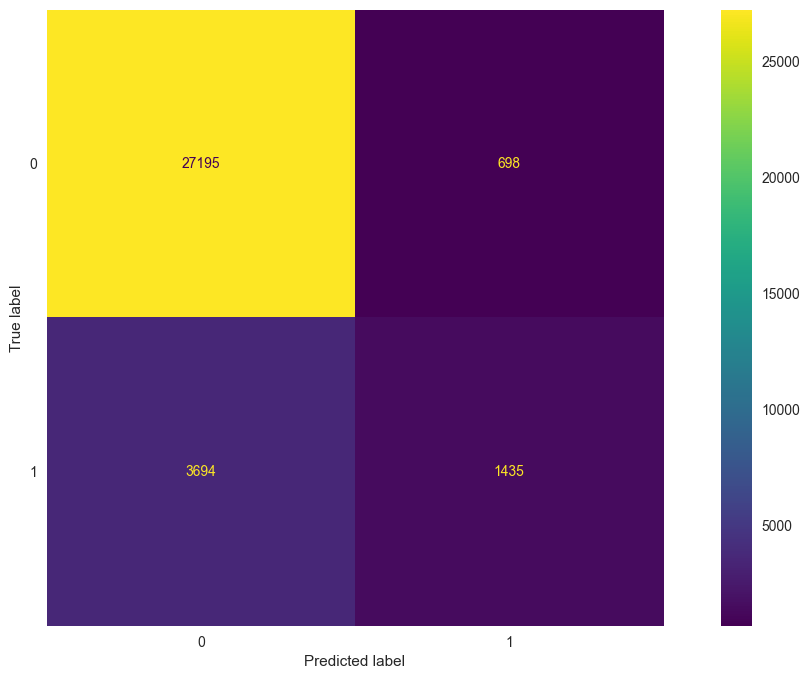

In [40]:
# Pemodelan 1 Logistic Regression
evaluation(y_test,logpred1)

Dari hasil di atas dapat dilihat bahwa akurasi prediksinya cukup tinggi yakni sebesar 0,87. Pemodelan 1 Logistic Regression di atas menghasilkan akurasi yang tinggi walaupun persentase correct predictions (true Yes and true No) pada confusion matrixnya kurang berimbang. Correct predictions dalam confusion matrix sebenarnya perlu diperhatikan untuk setiap kasus data. Dimana untuk kasus hujan ini, misal dalam konteks masyarakat umum (contoh: pekerja kantoran, mahasiswa, dsb) false yes yang tinggi tidak akan terlalu bermasalah, dibandingkan jika false no nya yang tinggi. 

Karena jika false no tinggi dimana diprediksi besok tidak akan hujan tapi ternyata hujan, maka orang-orang akan kehujanan karena tidak membawa payung atau mantel. Sedangkan jika false yes tinggi tidak akan terlalu bermasalah karena apabila diprediksi besok akan hujan tapi ternyata tidak hujan, orang-orang tidak akan kehujanan. Berbeda halnya jika sudah masuk ke dalam sektor industri tertentu, perlu diperhatikan correct predictions pada confusion matrixnya harus berimbang.

              precision    recall  f1-score   support

           0       0.94      0.75      0.83     27893
           1       0.35      0.73      0.47      5129

    accuracy                           0.75     33022
   macro avg       0.64      0.74      0.65     33022
weighted avg       0.85      0.75      0.78     33022

True Yes	: 3749	(73.09%)
False Yes	: 1380	(26.91%)
True No		: 20962	(75.15%)
False No	: 6931	(24.85%)


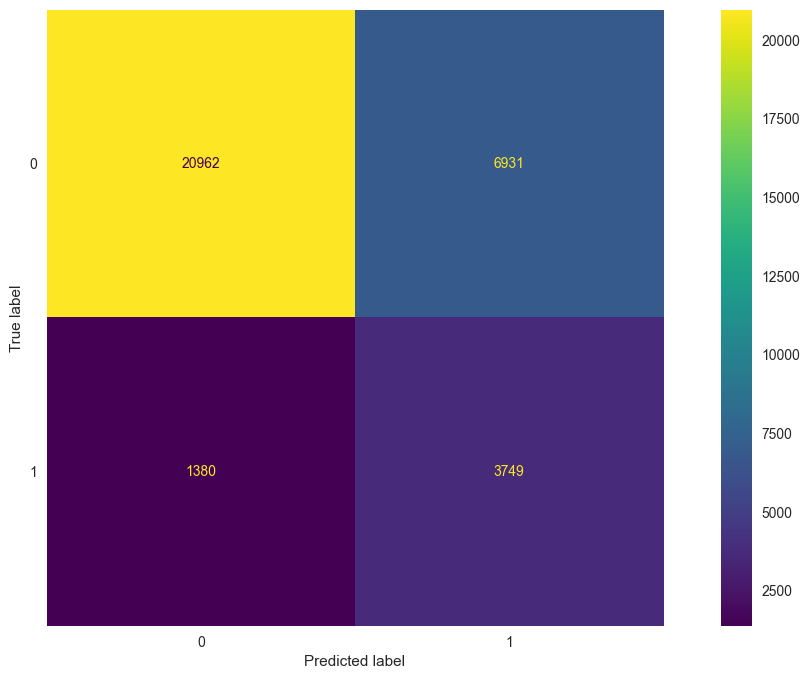

In [41]:
# Pemodelan 2 Logistic Regression
evaluation(y_test,logpred2)

Dengan menambah parameter class_weight="balanced", Pemodelan 2 Logistic Regression di atas memiliki persentase correct predictions (true Yes and true No) pada confusion matrix yang berimbang, walaupun akurasinya (sebesar 0,75) lebih kecil jika dibandingkan dengan Pemodelan 1 Logistic Regression. 

Pemodelan ini cocok digunakan untuk industri tertentu salah satu contohnya di sektor pertanian. Sektor pertanian butuh prediksi dengan persentase correct predictions (true Yes and true No) pada confusion matrix yang seimbang, dimana true yes dan true no harus lebih tinggi daripada false yes dan false no. Karena apabila false yes tinggi, maka akan berakibat pada kekeringan lahan yang berujung pada gagal panen. Sedangkan apabila false no tinggi, dapat menyebabkan tanaman menerima kandungan air berlebih dari hujan yang juga berujung pada kegagalan panen. 

#### Confusion Matrix - Support Vector Machine

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     27893
           1       0.78      0.25      0.38      5129

    accuracy                           0.87     33022
   macro avg       0.83      0.62      0.65     33022
weighted avg       0.86      0.87      0.84     33022

True Yes	: 1280	(24.96%)
False Yes	: 3849	(75.04%)
True No		: 27522	(98.67%)
False No	: 371	(1.33%)


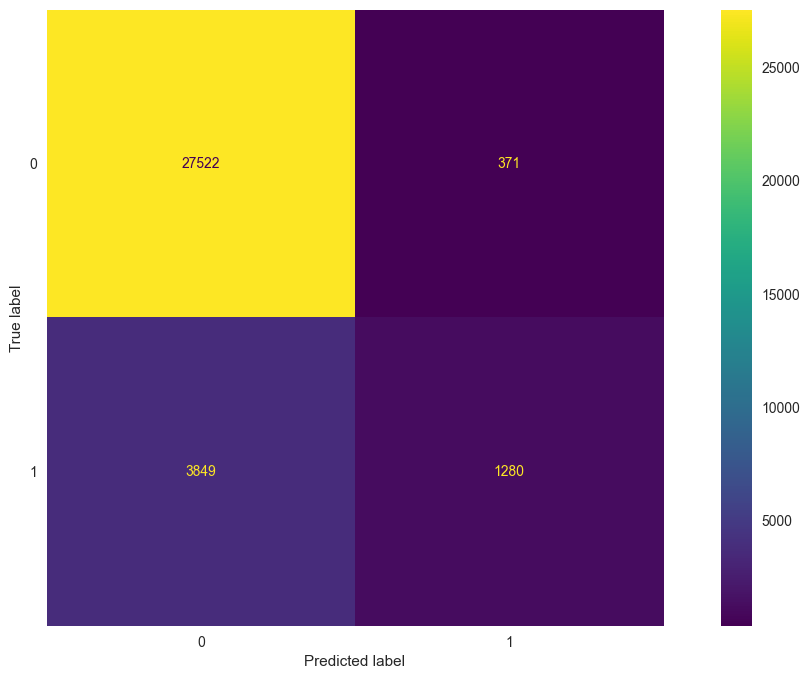

In [42]:
# Pemodelan 1 Support Vector Machine
evaluation(y_test,svmpred1) 

Dari hasil di atas dapat dilihat bahwa akurasi prediksinya cukup tinggi yakni sebesar 0,87. Pemodelan 1 Support Vector Machine di atas menghasilkan akurasi yang tinggi walaupun persentase correct predictions (true Yes and true No) pada confusion matrixnya kurang berimbang. Correct predictions dalam confusion matrix sebenarnya perlu diperhatikan untuk setiap kasus data. Dimana untuk kasus hujan ini, misal dalam konteks masyarakat umum (contoh: pekerja kantoran, mahasiswa, dsb) false yes yang tinggi tidak akan terlalu bermasalah, dibandingkan jika false no nya yang tinggi. 

Karena jika false no tinggi dimana diprediksi besok tidak akan hujan tapi ternyata hujan, maka orang-orang akan kehujanan karena tidak membawa payung atau mantel. Sedangkan jika false yes tinggi tidak akan terlalu bermasalah karena apabila diprediksi besok akan hujan tapi ternyata tidak hujan, orang-orang tidak akan kehujanan. Berbeda halnya jika sudah masuk ke dalam sektor industri tertentu, perlu diperhatikan correct predictions pada confusion matrixnya harus berimbang.

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     27893
           1       0.39      0.76      0.52      5129

    accuracy                           0.78     33022
   macro avg       0.67      0.77      0.69     33022
weighted avg       0.86      0.78      0.80     33022

True Yes	: 3879	(75.63%)
False Yes	: 1250	(24.37%)
True No		: 21844	(78.31%)
False No	: 6049	(21.69%)


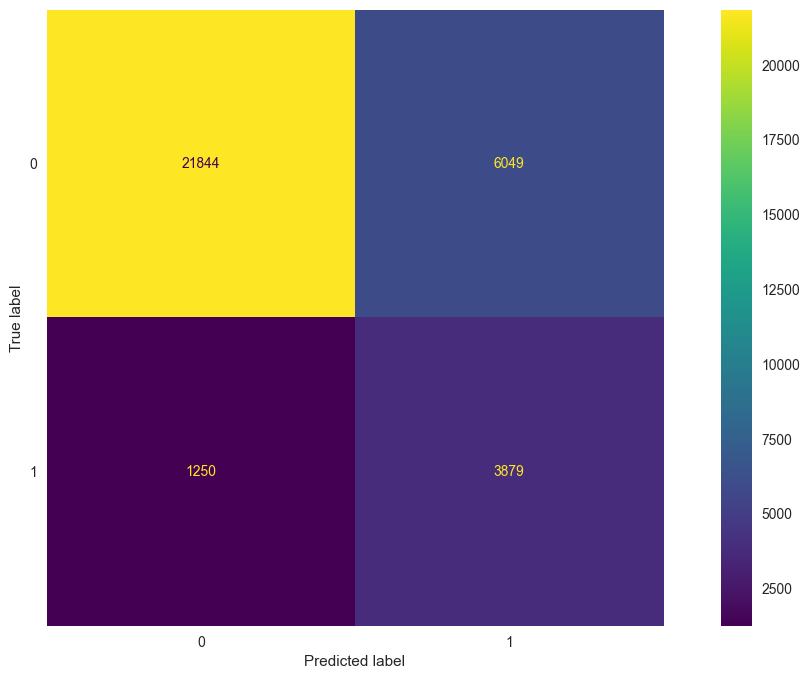

In [43]:
# Pemodelan 2 Support Vector Machine
evaluation(y_test,svmpred2) 

Dengan menambah parameter class_weight="balanced", Pemodelan 2 Support Vector Machine di atas memiliki persentase correct predictions (true Yes and true No) pada confusion matrix yang berimbang, walaupun akurasinya (sebesar 0,78) lebih kecil jika dibandingkan dengan Pemodelan 1 Support Vector Machine. 

Pemodelan ini cocok digunakan untuk industri tertentu salah satu contohnya di sektor pertanian. Sektor pertanian butuh prediksi dengan persentase correct predictions (true Yes and true No) pada confusion matrix yang seimbang, dimana true yes dan true no harus lebih tinggi daripada false yes dan false no. Karena apabila false yes tinggi, maka akan berakibat pada kekeringan lahan yang berujung pada gagal panen. Sedangkan apabila false no tinggi, dapat menyebabkan tanaman menerima kandungan air berlebih dari hujan yang juga berujung pada kegagalan panen. 

### Models Performance Score (Accuracy, Precision, Recall, and F1 score)

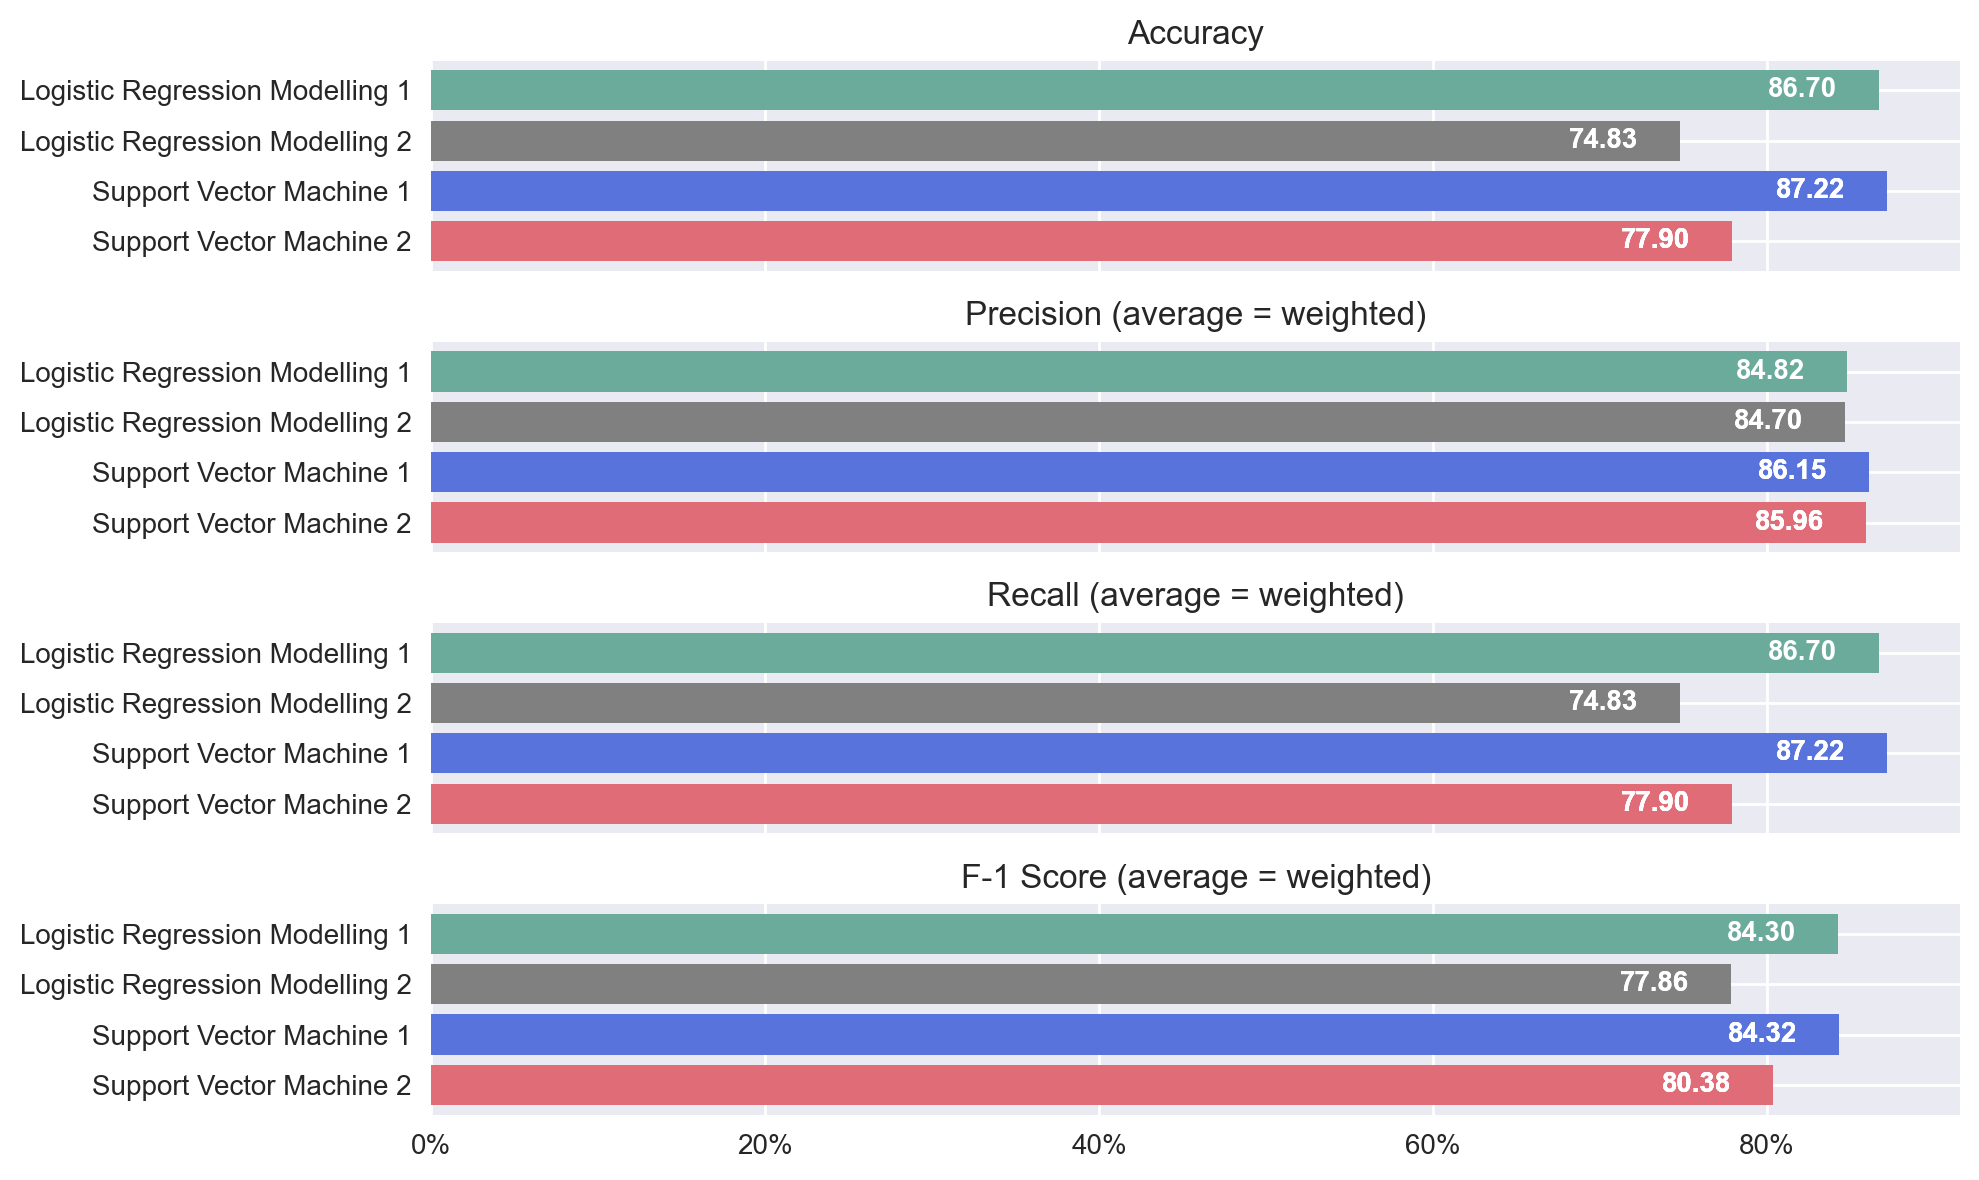

In [44]:
nrows,ncols = 4,1
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i in range(nrows):
    for j,k,l in zip(
        [svmpred2,svmpred1,logpred2,logpred1],
        ["Support Vector Machine 2","Support Vector Machine 1","Logistic Regression Modelling 2","Logistic Regression Modelling 1"],
        ["#E06C78","#5874DC","grey","#6AAB9C"]
    ):
        if i == 0:
            metric = accuracy_score(y_test,j) * 100
            title = "Accuracy"
        elif i == 1:
            metric = precision_score(y_test,j,average="weighted") * 100
            title = "Precision (average = weighted)"
        elif i == 2:
            metric = recall_score(y_test,j,average="weighted") * 100
            title = "Recall (average = weighted)"
        else:
            metric = f1_score(y_test,j,average="weighted") * 100
            title = "F-1 Score (average = weighted)"

        ax[i].barh(k,metric,color=l)
        ax[i].set_title(title)

        for container in ax[i].containers:
            ax[i].bar_label(container,fmt="%.2f",padding=-40,color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))

plt.tight_layout()
plt.show()

Kedua model memiliki score yang cukup tinggi untuk multiple metrics seperti accuracy, precision, recall, and f-1 score. Dan dapat dilihat juga bahwa Model SVM sedikit lebih baik dibandingkan model Logistic Regression, baik (Logistic Regression Modelling 1 vs Support Vector Machine 1) maupun Pemodelan yang ditambah parameter class_weight="balanced" (Logistic Regression Modelling 2 vs Support Vector Machine 2). Jadi model terbaik untuk memprediksi rain in Australia adalah SVM.

### Comparing Correct and Incorrect Predictions for Each Models

Setelah dilakukan evaluation pada semua model, selanjutnya akan dibandingkan hasil prediksinya yakni persentasi correct dan incorrect prediction untuk masing-masing model.

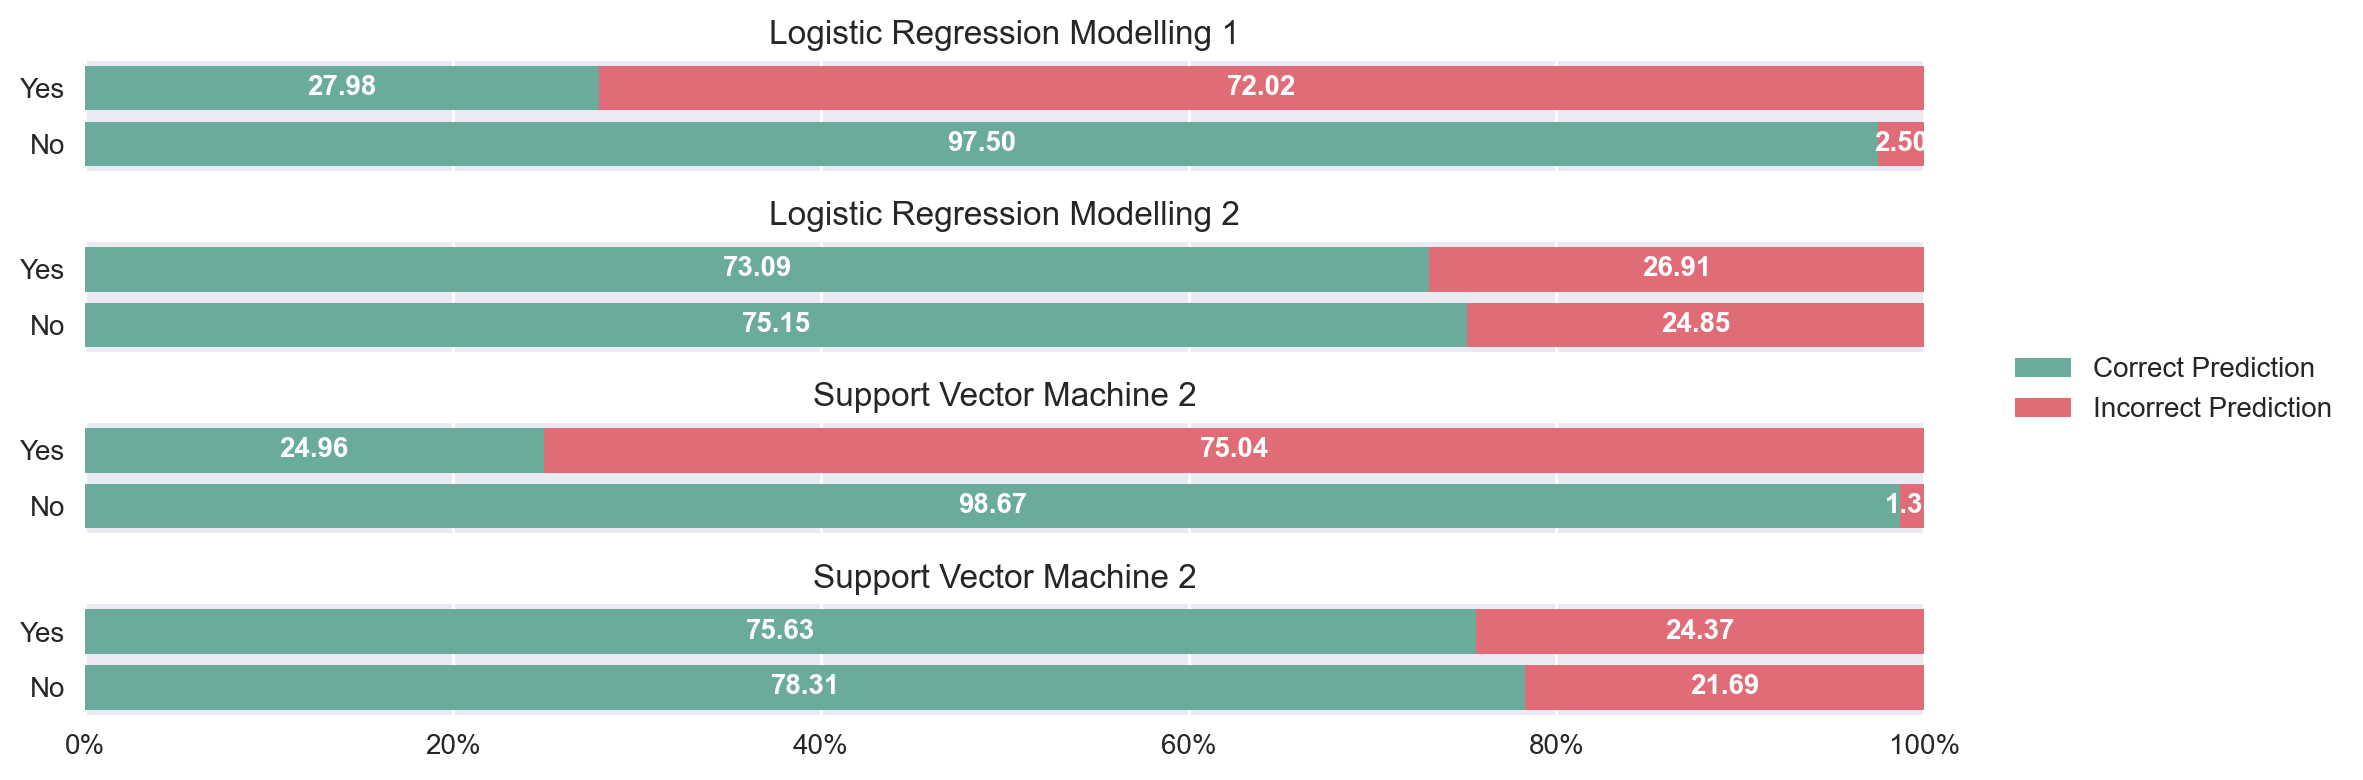

In [45]:
nrows,ncols = 4,1
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i,j,k in zip(range(nrows),[logpred1,logpred2,svmpred1,svmpred2],["Logistic Regression Modelling 1","Logistic Regression Modelling 2","Support Vector Machine 2","Support Vector Machine 2"]):
    true_yes = confusion_matrix(y_test,j)[1,1]
    false_yes = confusion_matrix(y_test,j)[1,0]
    true_no = confusion_matrix(y_test,j)[0,0]
    false_no = confusion_matrix(y_test,j)[0,1]

    ax[i].barh("No",true_no / (true_no + false_no) * 100,color="#6AAB9C",label="Correct Prediction")
    ax[i].barh("No",false_no / (true_no + false_no) * 100,left=true_no / (true_no + false_no) * 100,color="#E06C78",label="Incorrect Prediction")
    ax[i].barh("Yes",true_yes / (true_yes + false_yes) * 100,color="#6AAB9C")
    ax[i].barh("Yes",false_yes / (true_yes + false_yes) * 100,left=true_yes / (true_yes + false_yes) * 100,color="#E06C78")

    ax[i].set_title(k)
    ax[i].set_xlim(xmax=100)

    for container in ax[i].containers:
        ax[i].bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))
handles,labels = ax[i].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(1,0.5),loc="center left")

plt.tight_layout()
plt.show()

### Model Equation (For Logistic Regression)

In [46]:
# Pemodelan 1 Logistic Regression
e,x = sp.Symbol("e"),sp.Symbol("(x)")
x_symbols = [sp.Symbol(f"({i})") for i in X.columns]

sums = np.round(logreg1.intercept_[0],6)
for i in range(len(X.columns)):
    sums += x_symbols[i] * np.round(logreg1.coef_[0][i],6)

sp.Eq(sp.pi*x,e**sums / (1 + e**sums))

Eq(pi*(x), e**(1.092178*(Humidity3pm) + 0.050179*(Humidity9am) - 0.028273*(Location) - 0.158132*(MaxTemp) + 0.112903*(MinTemp) - 1.364278*(Pressure3pm) + 0.876516*(Pressure9am) + 0.057083*(RainToday) + 0.092175*(Rainfall) - 0.12974*(Temp3pm) + 0.063569*(WindDir3pm) - 0.081074*(WindDir9am) + 0.029412*(WindGustDir) + 0.409498*(WindGustSpeed) - 2.212802)/(e**(1.092178*(Humidity3pm) + 0.050179*(Humidity9am) - 0.028273*(Location) - 0.158132*(MaxTemp) + 0.112903*(MinTemp) - 1.364278*(Pressure3pm) + 0.876516*(Pressure9am) + 0.057083*(RainToday) + 0.092175*(Rainfall) - 0.12974*(Temp3pm) + 0.063569*(WindDir3pm) - 0.081074*(WindDir9am) + 0.029412*(WindGustDir) + 0.409498*(WindGustSpeed) - 2.212802) + 1))

In [47]:
# Pemodelan 2 Logistic Regression
e,x = sp.Symbol("e"),sp.Symbol("(x)")
x_symbols = [sp.Symbol(f"({i})") for i in X.columns]

sums = np.round(logreg2.intercept_[0],6)
for i in range(len(X.columns)):
    sums += x_symbols[i] * np.round(logreg2.coef_[0][i],6)

sp.Eq(sp.pi*x,e**sums / (1 + e**sums))

Eq(pi*(x), e**(1.077508*(Humidity3pm) + 0.082189*(Humidity9am) - 0.021625*(Location) - 0.191926*(MaxTemp) + 0.097041*(MinTemp) - 1.432156*(Pressure3pm) + 0.931788*(Pressure9am) + 0.031049*(RainToday) + 0.134678*(Rainfall) - 0.054262*(Temp3pm) + 0.029392*(WindDir3pm) - 0.084222*(WindDir9am) + 0.046753*(WindGustDir) + 0.436607*(WindGustSpeed) - 0.525645)/(e**(1.077508*(Humidity3pm) + 0.082189*(Humidity9am) - 0.021625*(Location) - 0.191926*(MaxTemp) + 0.097041*(MinTemp) - 1.432156*(Pressure3pm) + 0.931788*(Pressure9am) + 0.031049*(RainToday) + 0.134678*(Rainfall) - 0.054262*(Temp3pm) + 0.029392*(WindDir3pm) - 0.084222*(WindDir9am) + 0.046753*(WindGustDir) + 0.436607*(WindGustSpeed) - 0.525645) + 1))

## J. Models Inference

In [48]:
# Data baru yang selanjutnya akan dimodelkan
model_inference = {
    "Location":[4, 1, 2, 3],
    'MinTemp': [93, 125, 87, 34],
    'MaxTemp': [152, 77, 58, 46],
    'Rainfall': [75, 36, 141, 40],
    'WindGustDir': [10, 6, 13, 13],
    'WindGustSpeed': [8, 14, 9, 11],
    'WindDir9am': [2, 5, 15, 2],
    'WindDir3pm': [6, 6, 13, 8],
    'Humidity9am': [55, 61, 38, 44],
    'Humidity3pm': [17, 69, 23, 32],
    'Pressure9am': [139, 68, 96, 199],
    'Pressure3pm': [97, 43, 134, 188],
    'Temp3pm': [163, 70, 68, 53],
    'RainToday': [0, 1, 1, 0]
}

# Data yang ada dijadikan DataFrame
model_inference = pd.DataFrame(model_inference)
model_inference

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday
0,4,93,152,75,10,8,2,6,55,17,139,97,163,0
1,1,125,77,36,6,14,5,6,61,69,68,43,70,1
2,2,87,58,141,13,9,15,13,38,23,96,134,68,1
3,3,34,46,40,13,11,2,8,44,32,199,188,53,0


In [49]:
# Melakukan pemodelan terhadap data baru
pred1 = logreg1.predict(model_inference)
pred2 = logreg2.predict(model_inference)
pred3 = svm1.predict(model_inference)
pred4 = svm2.predict(model_inference)

# Untuk melihat prediksi dari pemodelan yang sudah dibuat terhadap data baru
print("Logistic Regression Model 1 = ",pred1)
print("Logistic Regression Model 2 = ",pred2)
print("Support Virtual Machine Model 1 = ",pred3)
print("Support Virtual Machine Model 1 = ",pred4)

Logistic Regression Model 1 =  [0 1 0 0]
Logistic Regression Model 2 =  [0 1 0 0]
Support Virtual Machine Model 1 =  [0 0 0 0]
Support Virtual Machine Model 1 =  [1 1 1 1]


Save semua final models untuk kemudian hari.

In [50]:
model = [logreg1,logreg2,svm1,svm2]
file_name = ["logistic_regression_model1","logistic_regression_model2","support_vector_machine_model1","support_vector_machine_model2"]
extension = "json"

for i,j in zip(model,file_name):
    with open(f"{j}.{extension}","wb") as files:
        dump(i,files)
    print(f"{j}.{extension} has been downloaded")

logistic_regression_model1.json has been downloaded
logistic_regression_model2.json has been downloaded
support_vector_machine_model1.json has been downloaded
support_vector_machine_model2.json has been downloaded


# K. Conclusion

Berdasarkan analisis di atas, dapat dilihat bahwa kedua model baik Logistic Regression maupun SVM memiliki akurasi yang cukup tinggi dan keduanya dapat menangani masalah ketidakseimbangan prediksi (dengan menambah parameter class_weight="balanced") secara baik, ditunjukkan oleh persentase yang tinggi dari correct predictions (true Yes and true No). Selain itu, kedua model juga memiliki score yang cukup tinggi untuk multiple metrics seperti accuracy, precision, recall, and f-1 score. Model yang akan dipilih sebaiknya disesuaikan juga dengan implementasinya pada bidang atau sektor yang akan diaplikasikan. Karena setiap model menghasilkan persentase correct predictions yang berbeda dalam confusion matrix sehingga dapat menjadi pertimbangan untuk memilih model yang akan digunakan. Setelah dilakukan analisis secara keseluruhan dapat disimpulkan bahwa model terbaik untuk memprediksi **Rain in Australia** adalah **Support Vector Machine**.